In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv('C:/Users/Ali ESF/Downloads/archive/covtype.csv')

# display train data
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
# drop ID column
train = train.iloc[:,1:]
train.head()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,51,3,258,0,510,221,232,148,6279,1,...,0,0,0,0,0,0,0,0,0,5
1,56,2,212,-6,390,220,235,151,6225,1,...,0,0,0,0,0,0,0,0,0,5
2,139,9,268,65,3180,234,238,135,6121,1,...,0,0,0,0,0,0,0,0,0,2
3,155,18,242,118,3090,238,238,122,6211,1,...,0,0,0,0,0,0,0,0,0,2
4,45,2,153,-1,391,220,234,150,6172,1,...,0,0,0,0,0,0,0,0,0,5


In [9]:
# size of data frame
train.shape

(581012, 54)

Since all variables are numeric integers, there are no need for further conversions.

In [44]:
# look at the data types of each feature and see if there needs to be any pre-processing
train.dtypes

Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                            int64
Soil_Type10                     

In [11]:
# extract all numerical features from train
num_features = train.iloc[:,:10]

# extract all binary features from train
cat_features = train.iloc[:, 10:-1]

In [12]:
#!pip install numpy==1.16.5
num_features.describe()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865
std,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379
min,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000
50%,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000
75%,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000
max,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000


In [13]:
#!pip install numpy==1.20.1
#pip install --upgrade pandas

In [14]:
cat_features.describe()

,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
skew = train.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])

In [16]:
print(skew)

Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7                             74.367173
Soil_Type8          

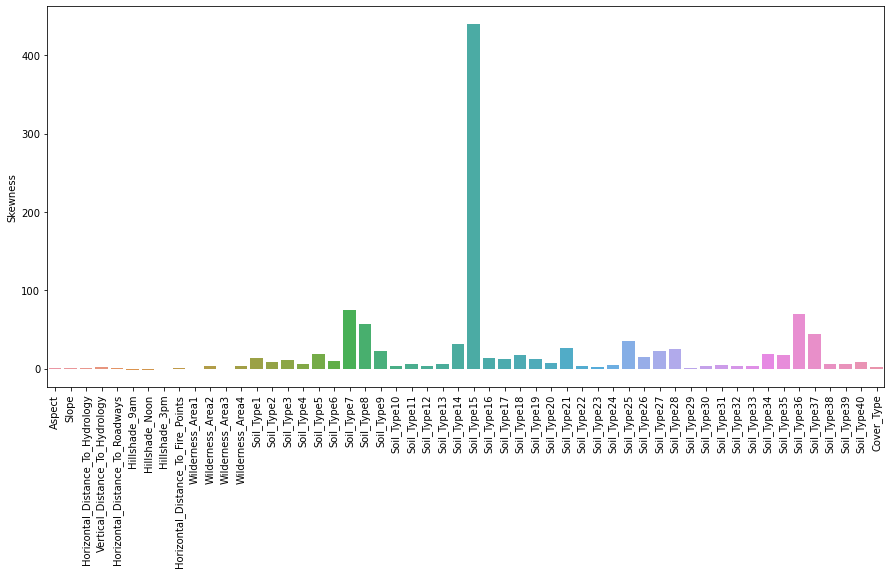

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

In [18]:
train.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

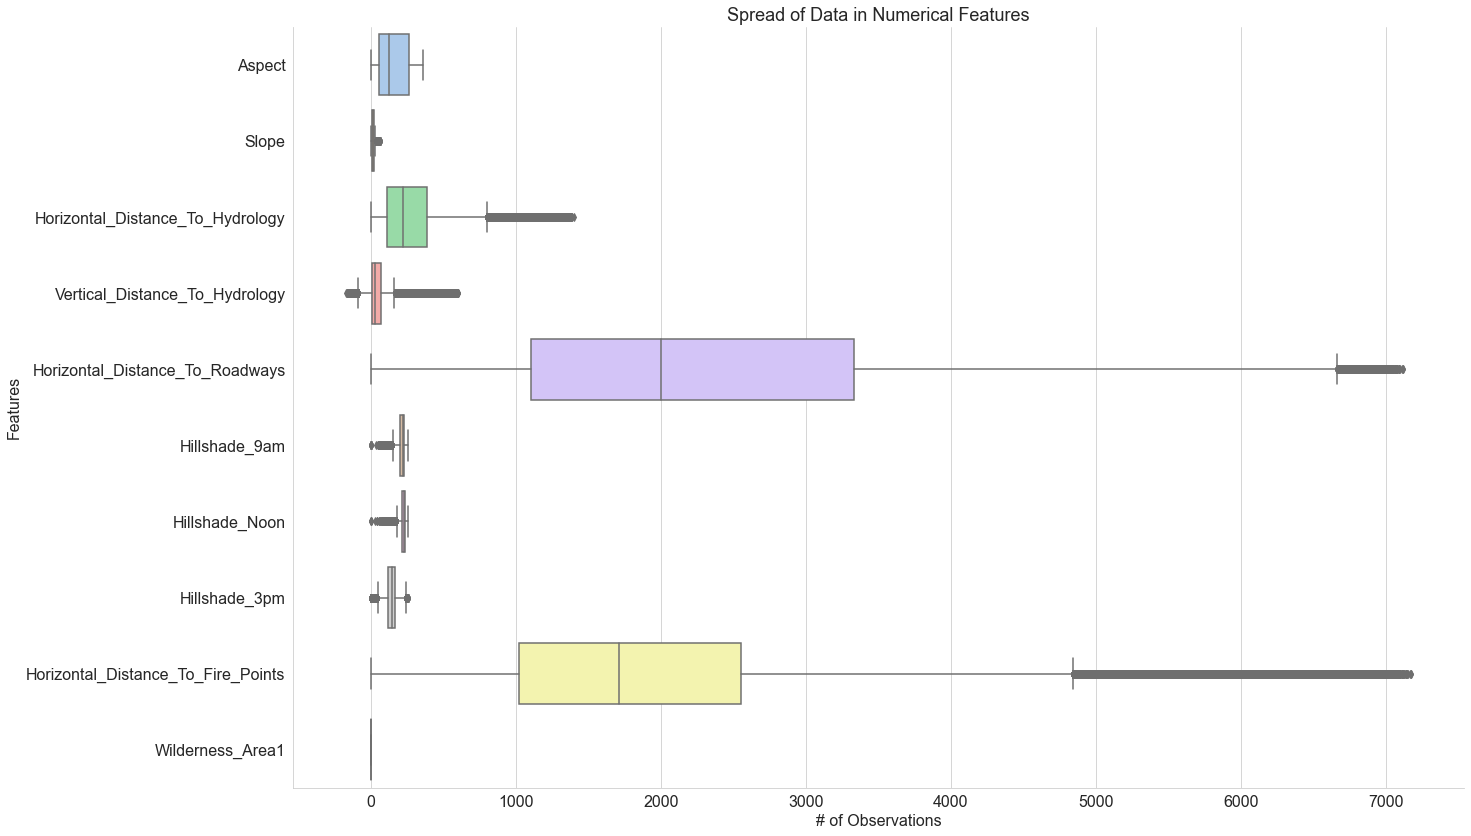

In [19]:
# plot bg
sns.set_style("whitegrid")

plt.subplots(figsize=(21,14))
color = sns.color_palette('pastel')
sns.boxplot(data=num_features, orient='h', palette=color)
plt.title('Spread of Data in Numerical Features', size=18)
plt.xlabel('# of Observations', size=16)
plt.ylabel('Features', size=16)
plt.xticks(size=16)
plt.yticks(size=16)

sns.despine()
plt.show()

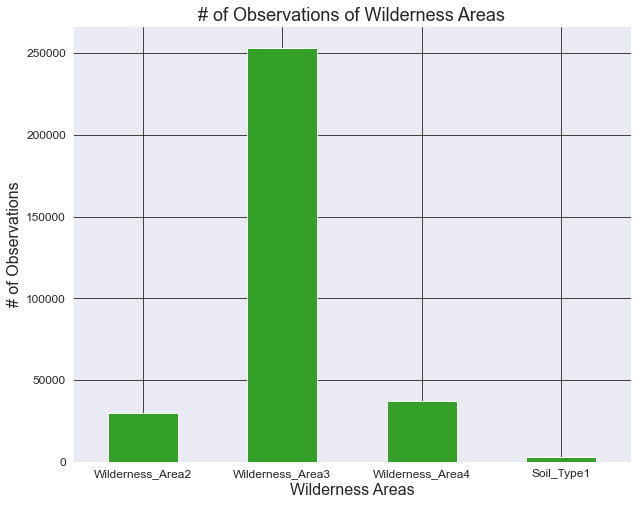

In [20]:
# split cat_features
wild_data, soil_data = cat_features.iloc[:,:4], cat_features.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

# use seaborn, pass colors to palette
palette = sns.color_palette(flatui)

# sum the data, plot bar
wild_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('# of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas', size=16)
plt.ylabel('# of Observations', size=16)
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

In [21]:
# total count of each wilderness area
wild_data.sum()

Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
Soil_Type1            3031
dtype: int64

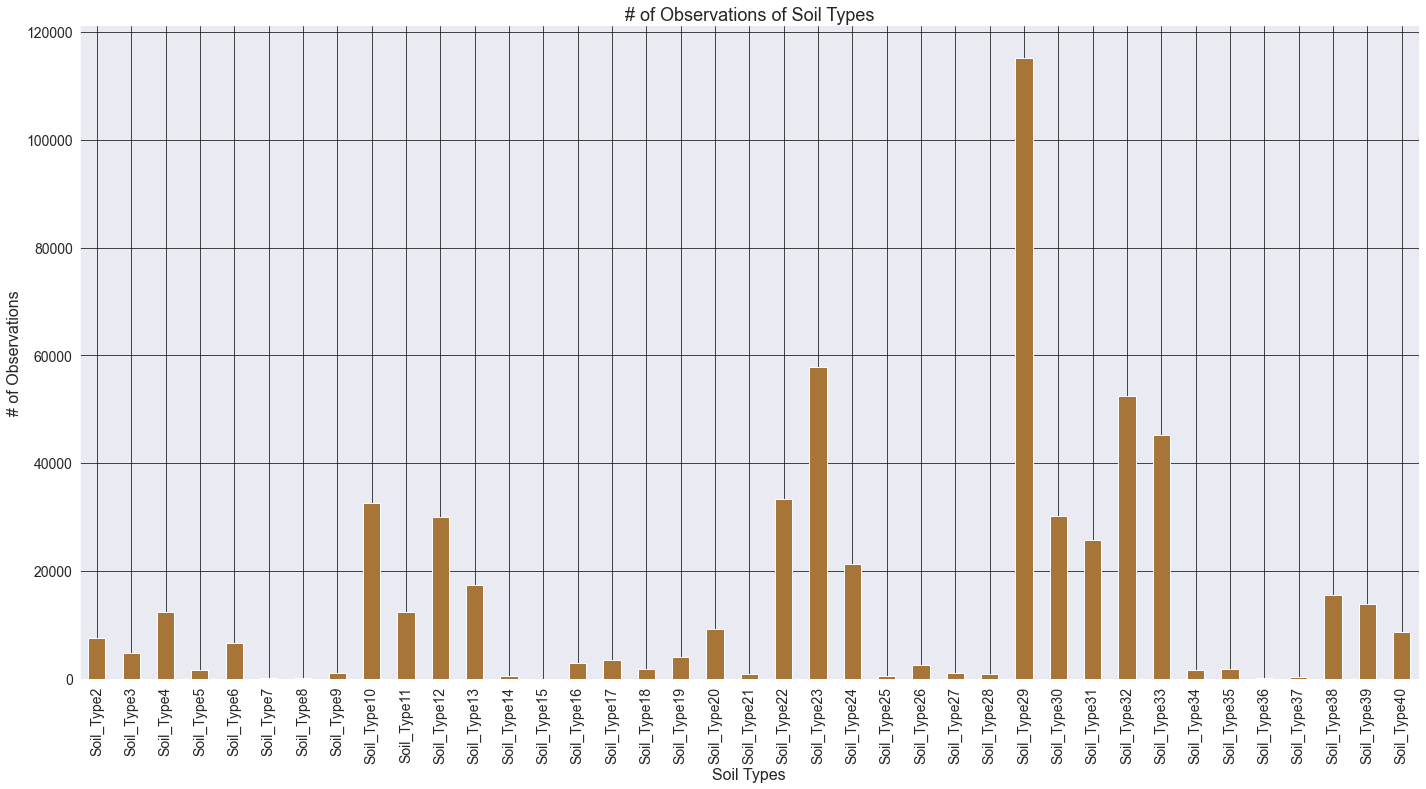

In [22]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum data, plot bar
soil_data.sum().plot(kind='bar', figsize=(24,12), color='#a87539')
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('# of Observations', size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

In [23]:
# statistical description of highest observation of soil type
soil_data.loc[:,'Soil_Type10'].describe()

count    581012.000000
mean          0.056168
std           0.230245
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Soil_Type10, dtype: float64

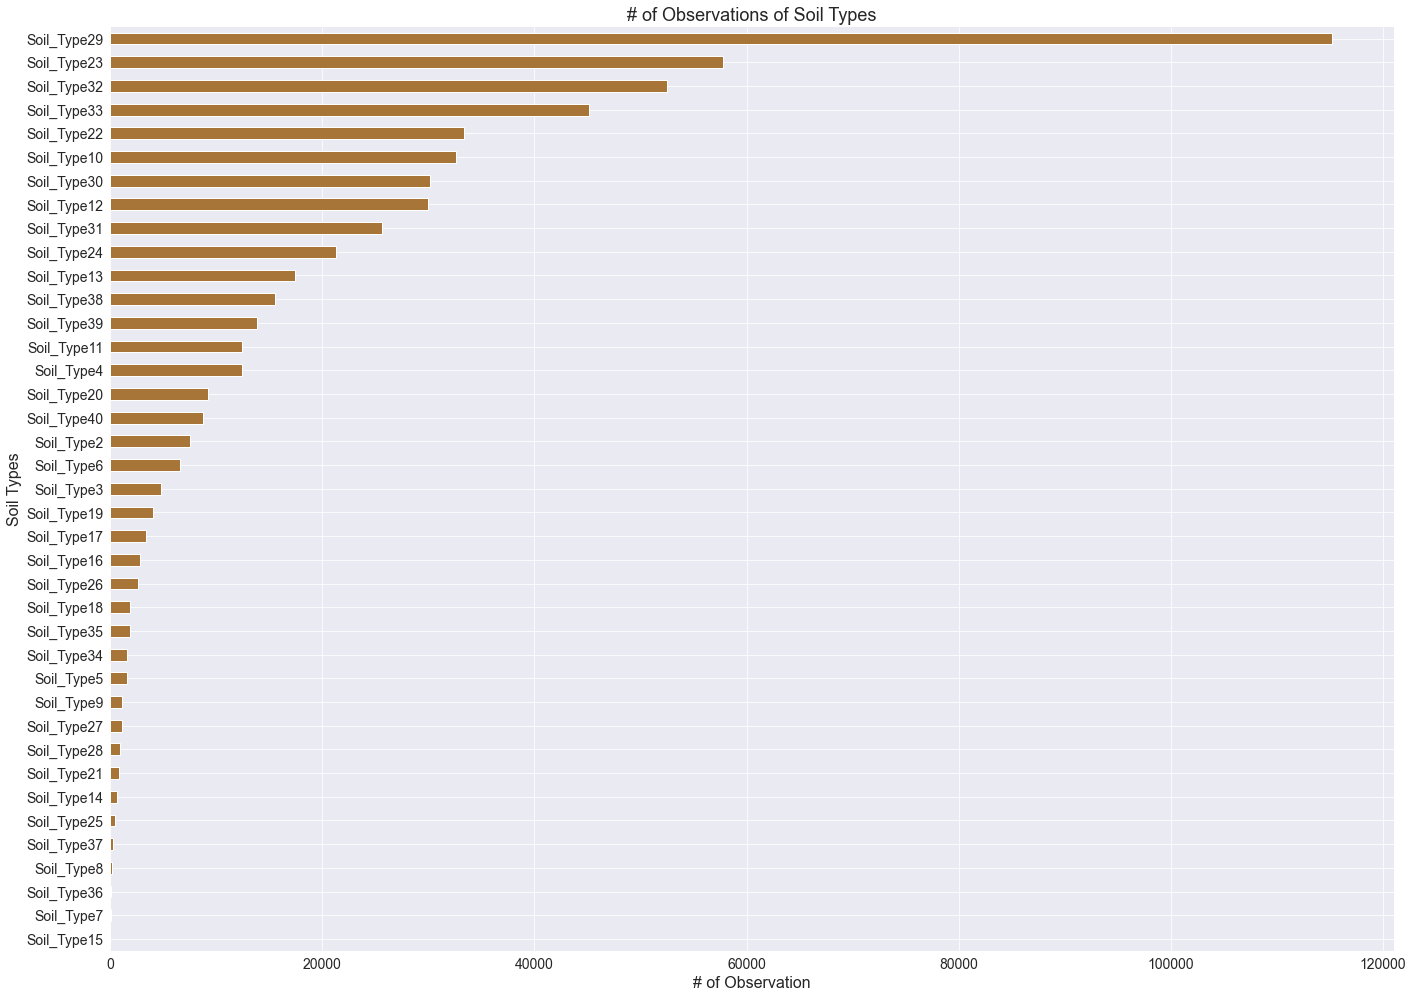

In [24]:
# plot bg
sns.set_style("darkgrid", {'grid_color': '.1'})

# sum soil data, pass it as a series
soil_sum = pd.Series(soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)

# plot bar
soil_sum.plot(kind='barh', figsize=(23,17), color='#a87539')
plt.gca().invert_yaxis()
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('# of Observation', size=16)
plt.ylabel('Soil Types', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

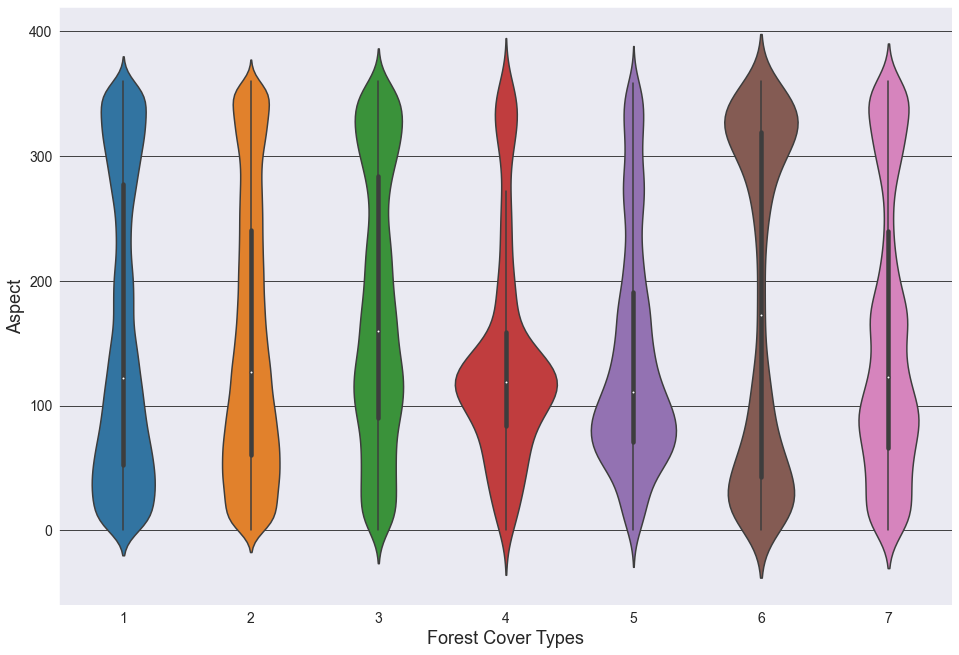

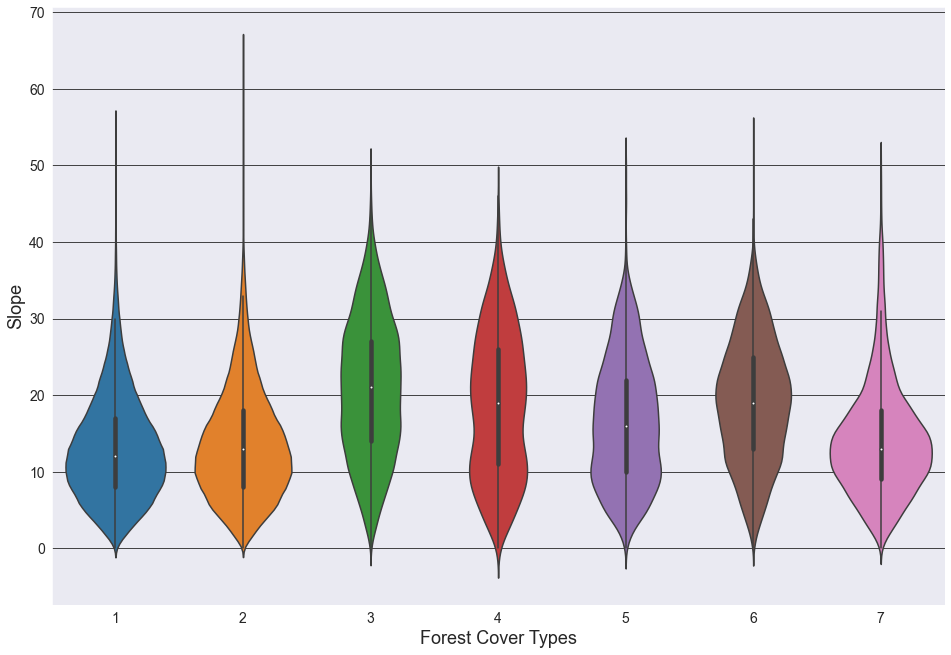

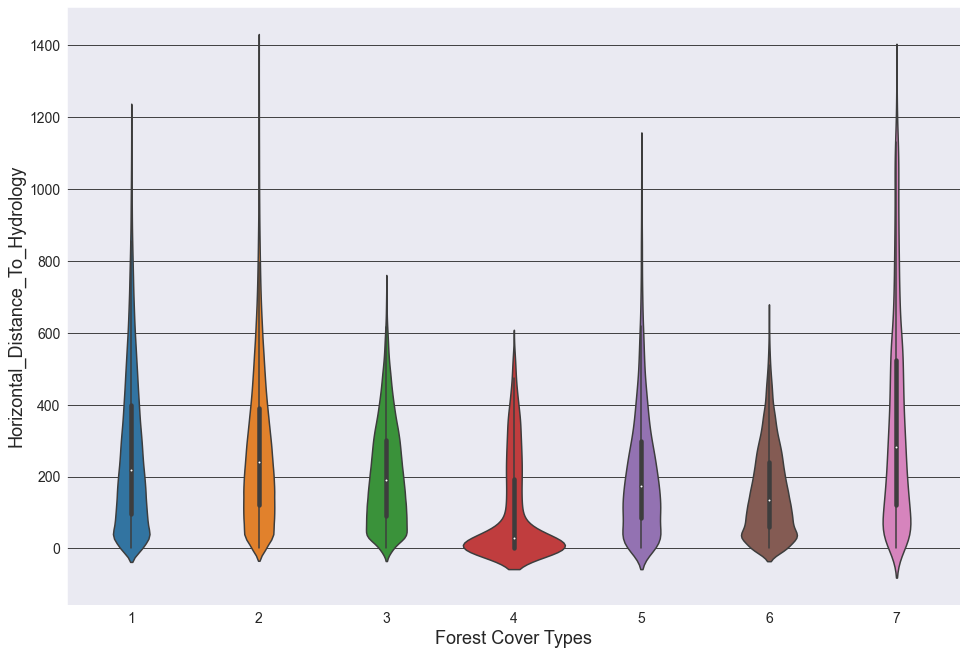

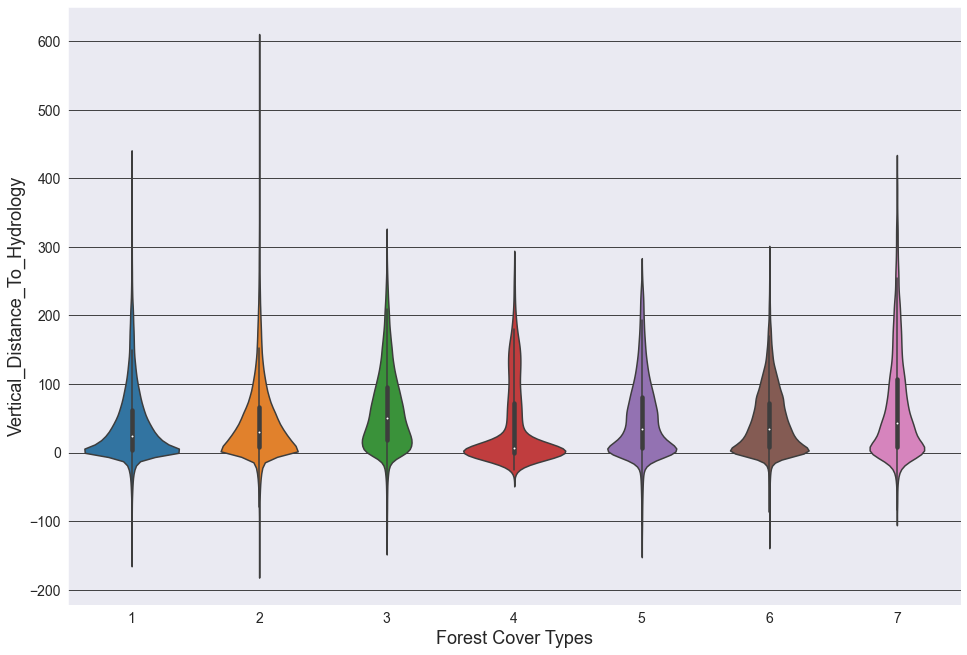

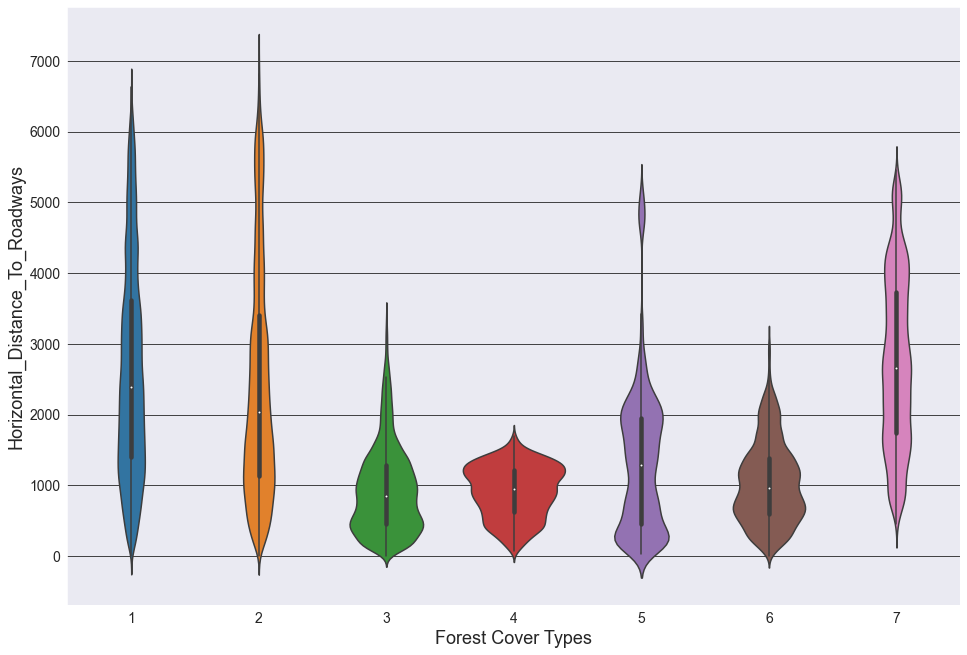

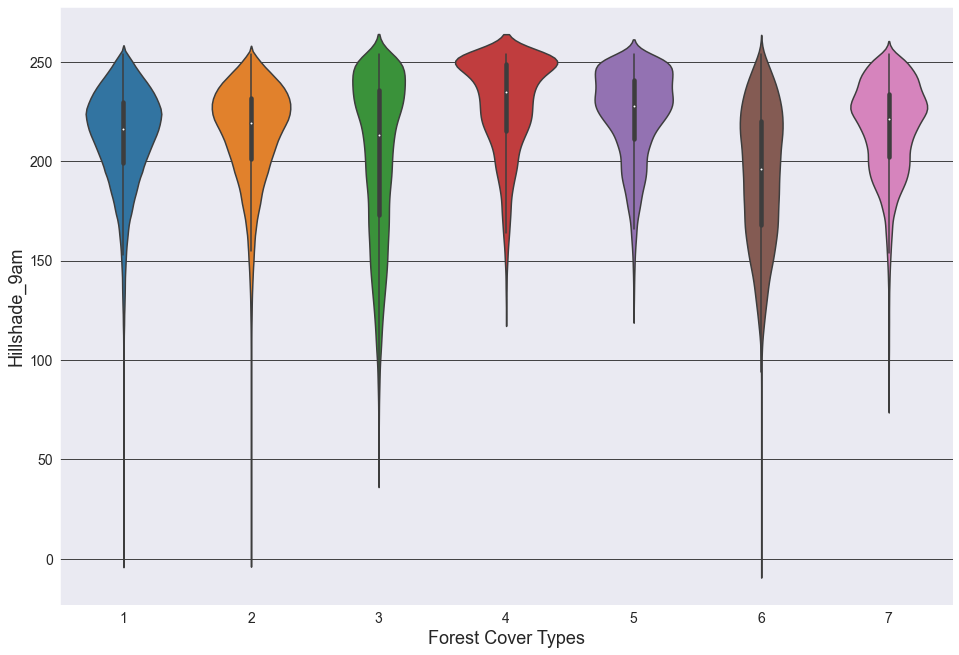

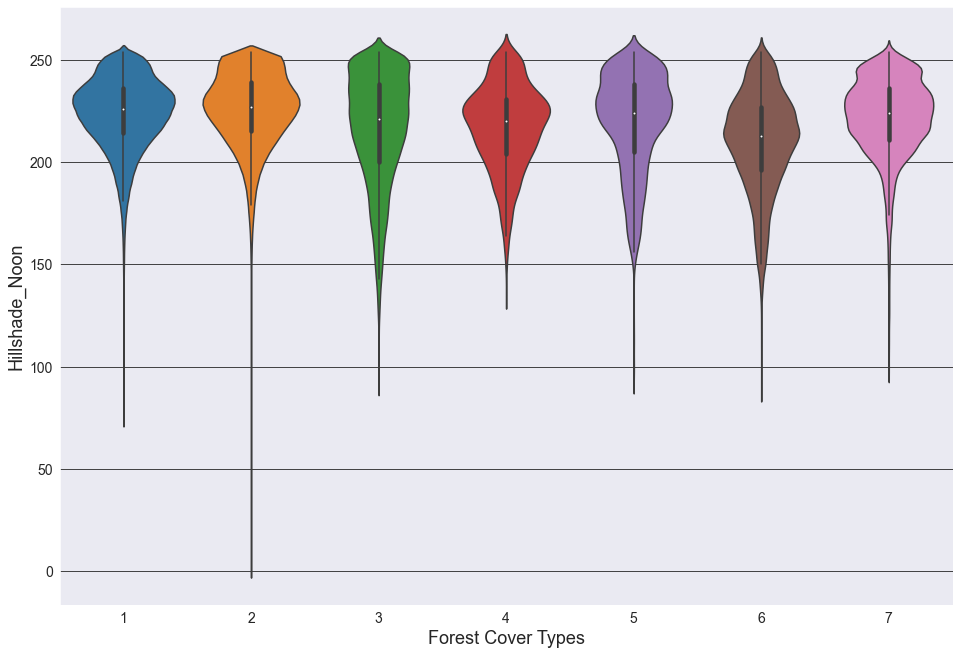

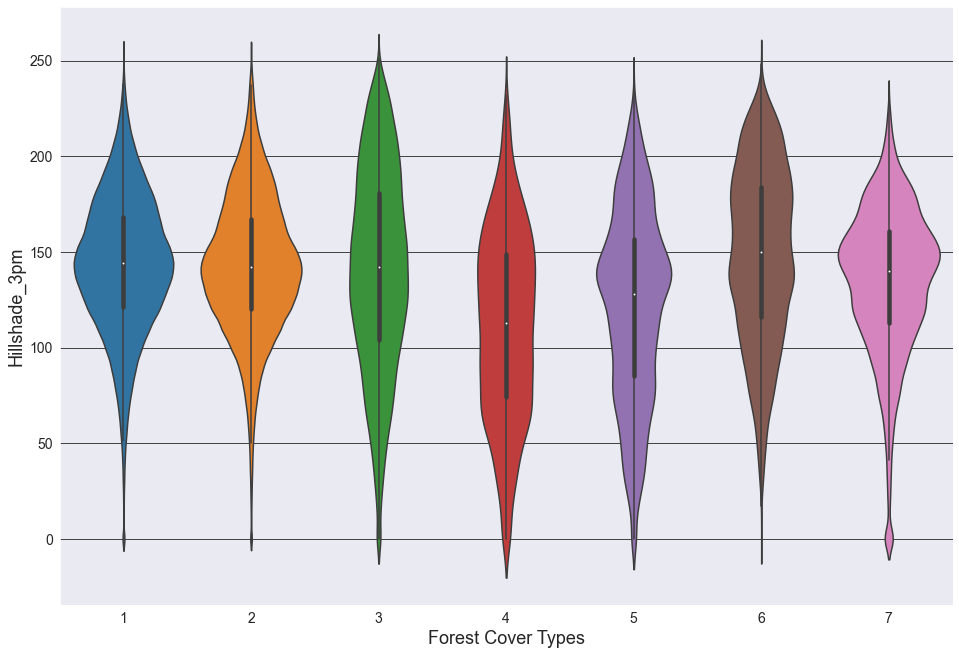

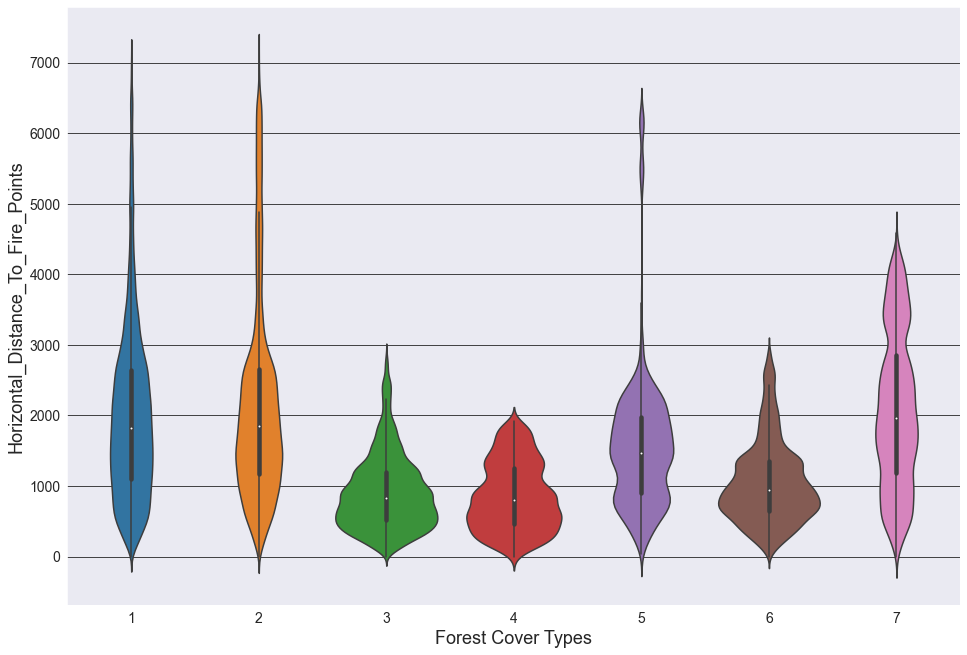

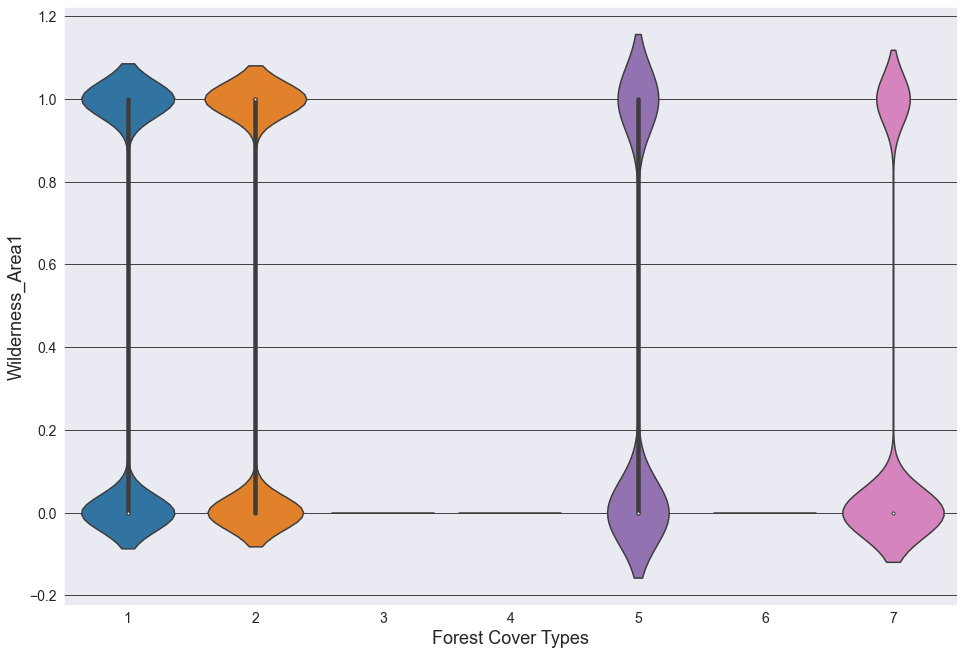

In [25]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = train['Cover_Type']

# features to be compared with target variable
features = num_features.columns

# loop for violin plot
for i in range(0, len(features)):
    plt.subplots(figsize=(16,11))
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=18)
    plt.ylabel(features[i], size=18)
    
    plt.show()

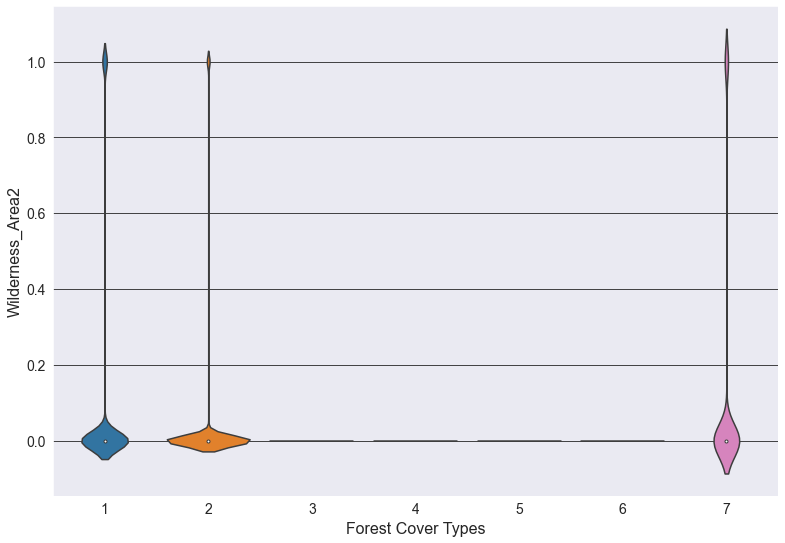

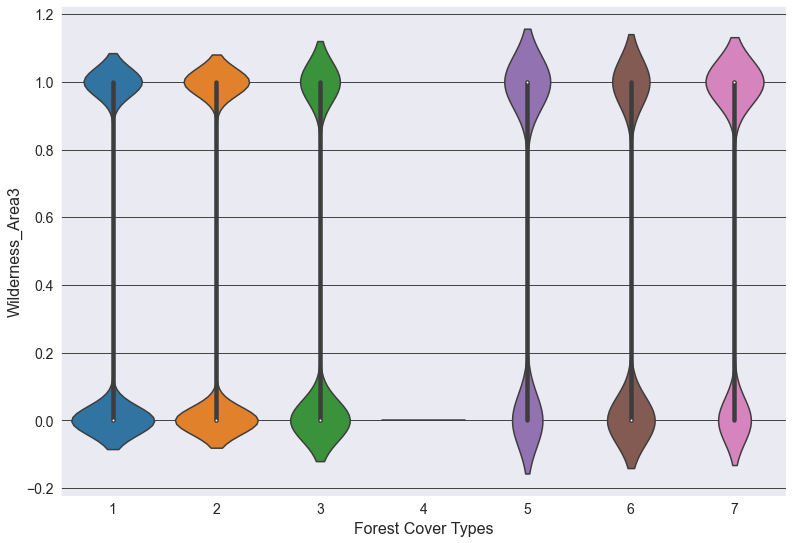

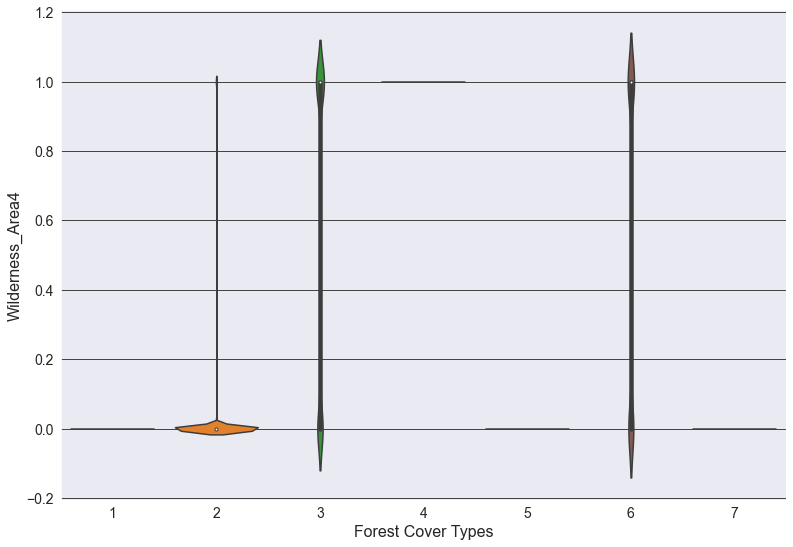

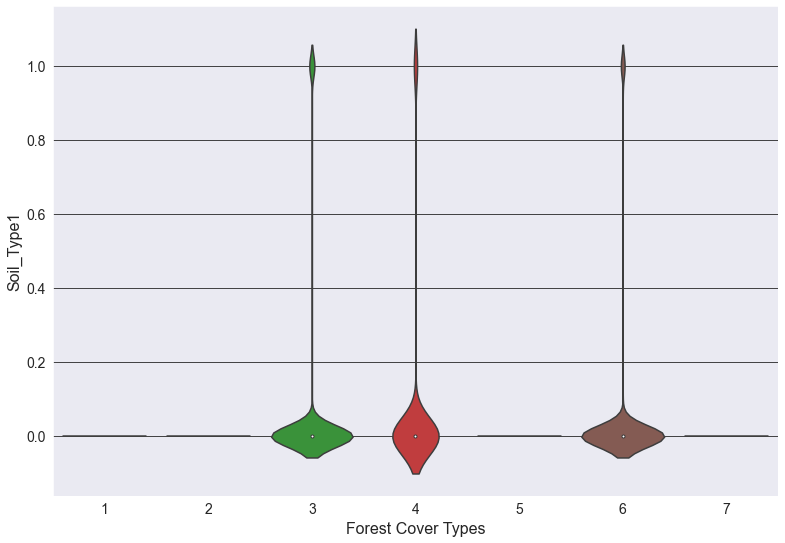

In [26]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = train['Cover_Type']
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=50, random_state=53)
# features to be compared with target variable
features = wild_data.columns

# loop for violin plots
for i in range(0, len(features)):
    
    plt.subplots(figsize=(13,9))
    sns.violinplot(data=wild_data, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=16)
    plt.ylabel(features[i], size=16)
    
    plt.show()

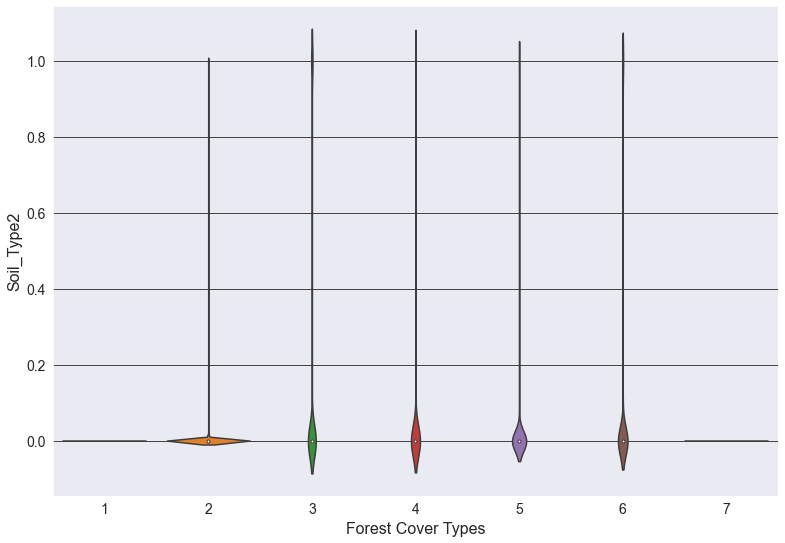

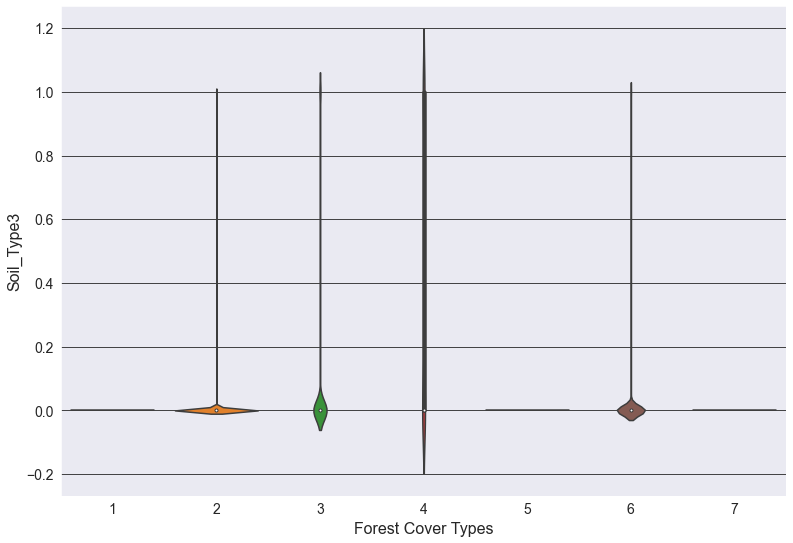

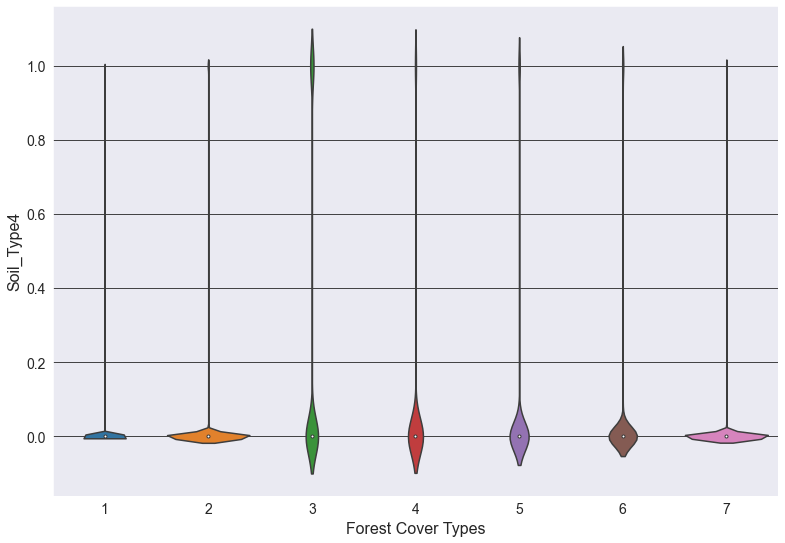

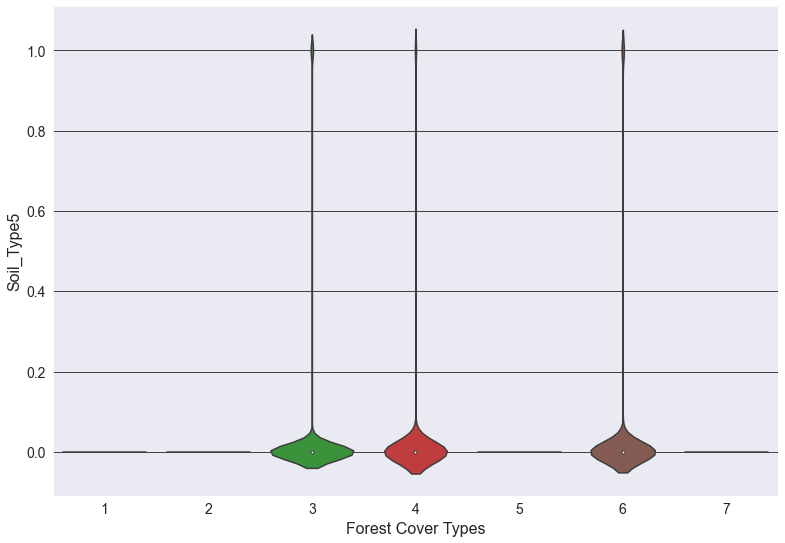

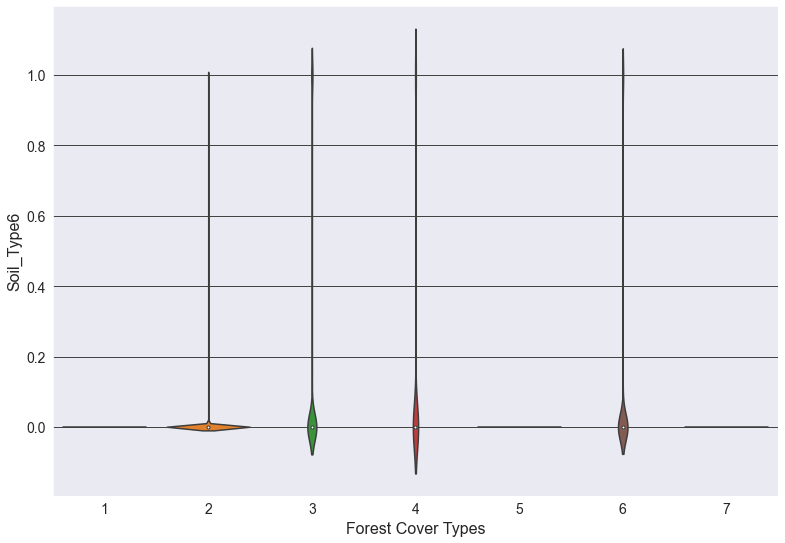

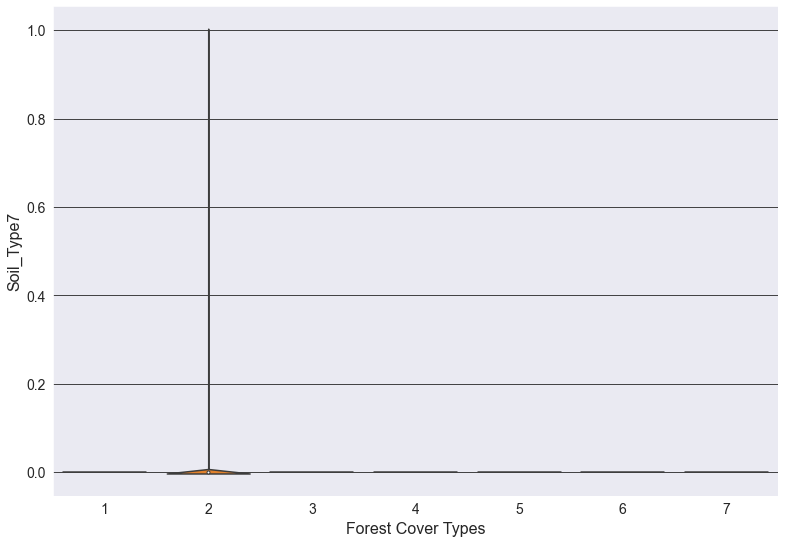

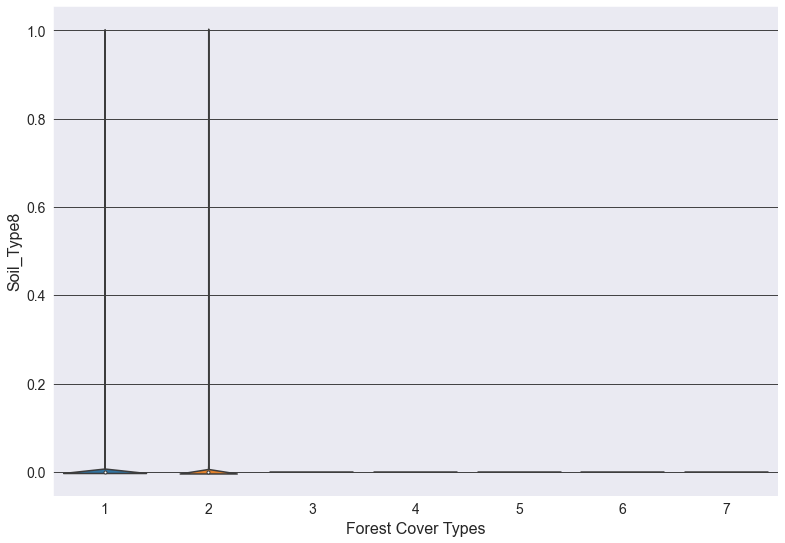

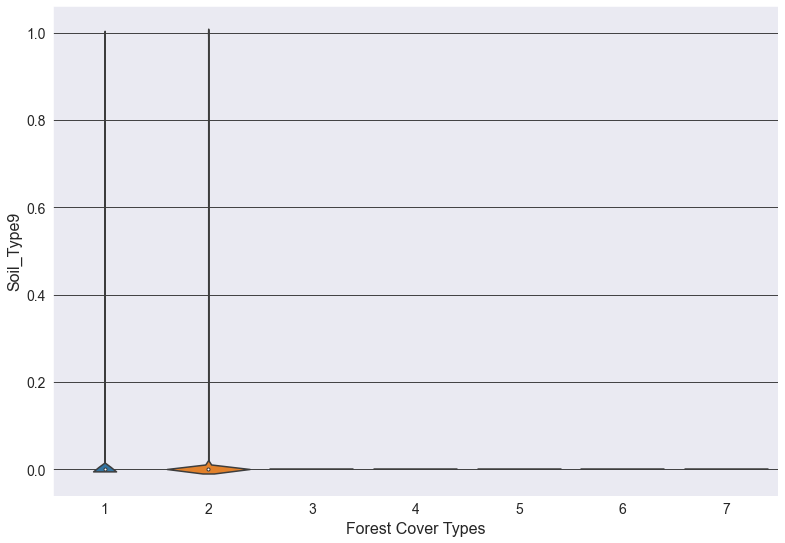

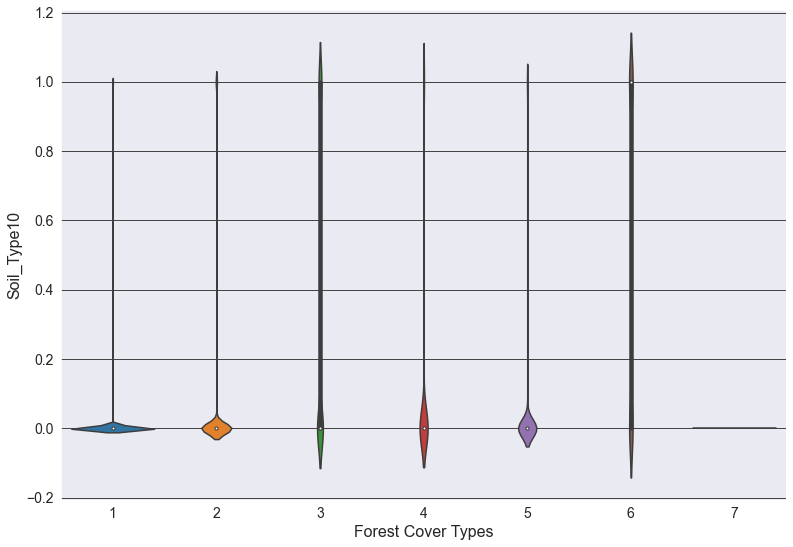

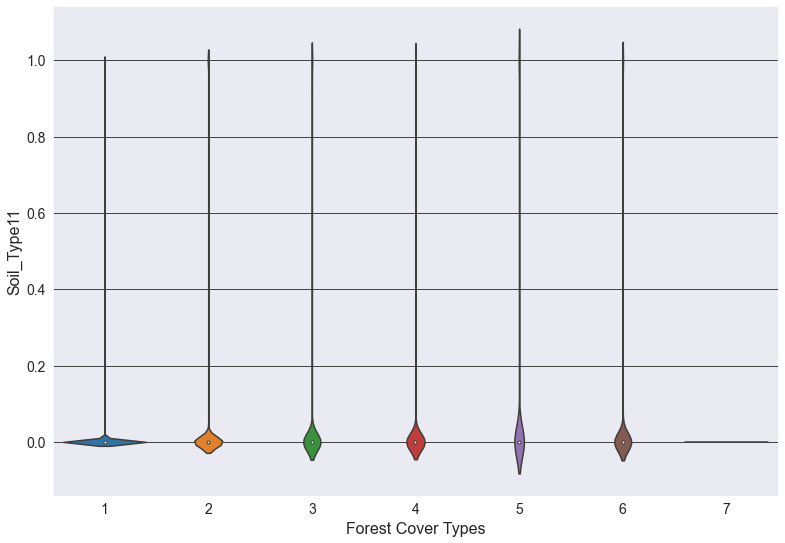

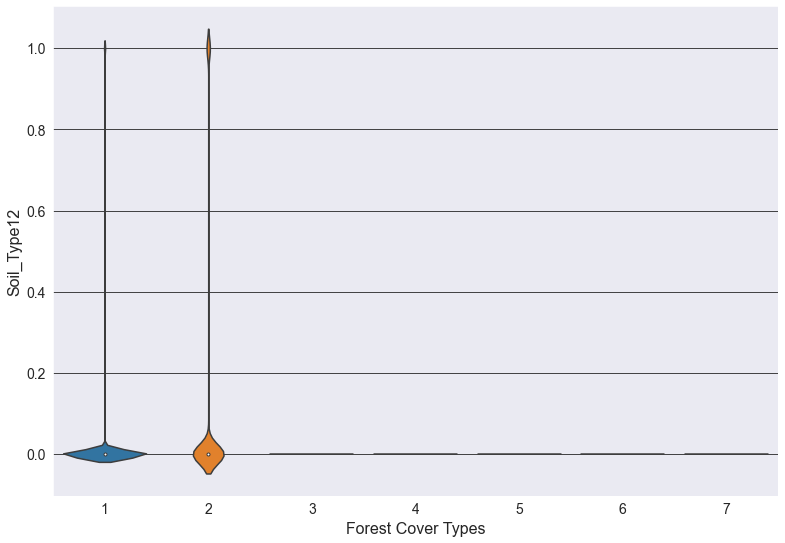

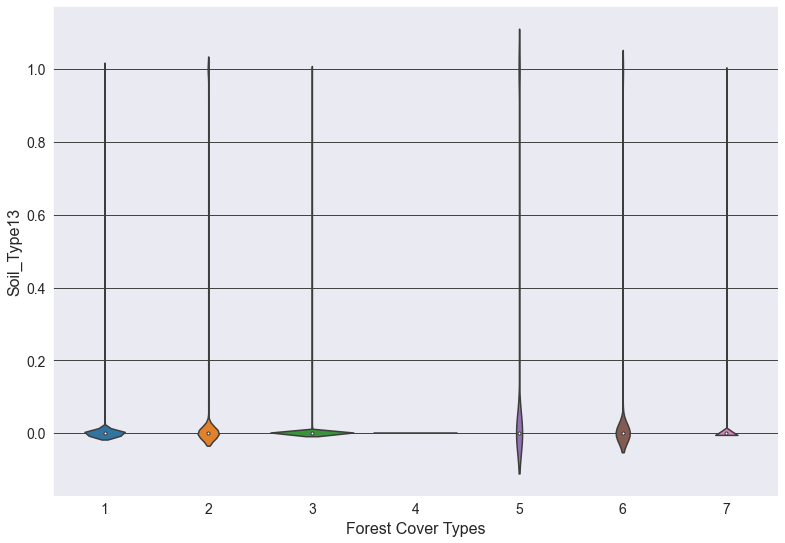

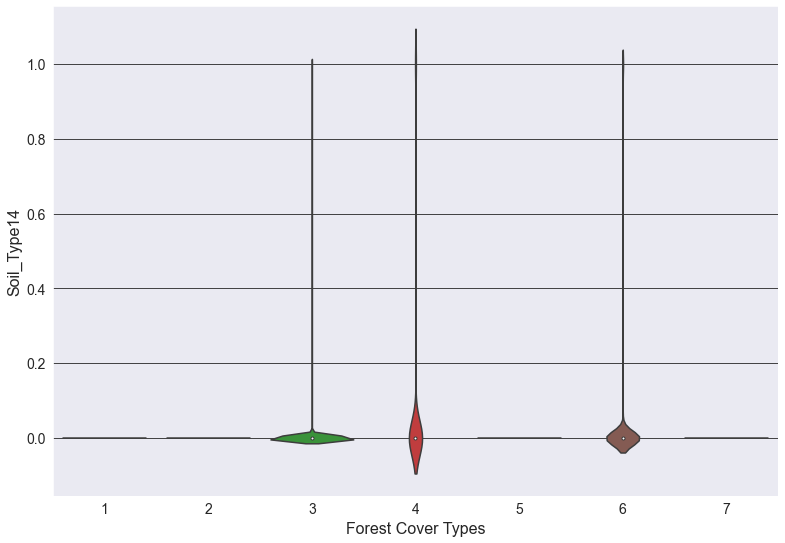

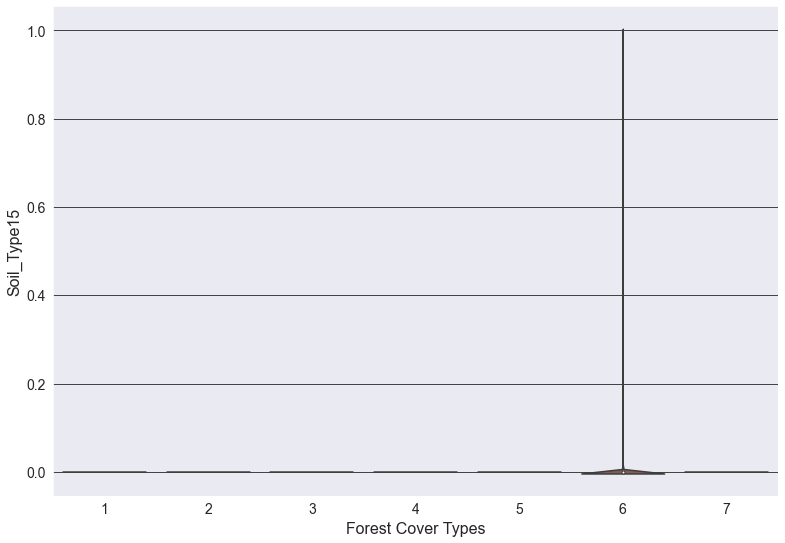

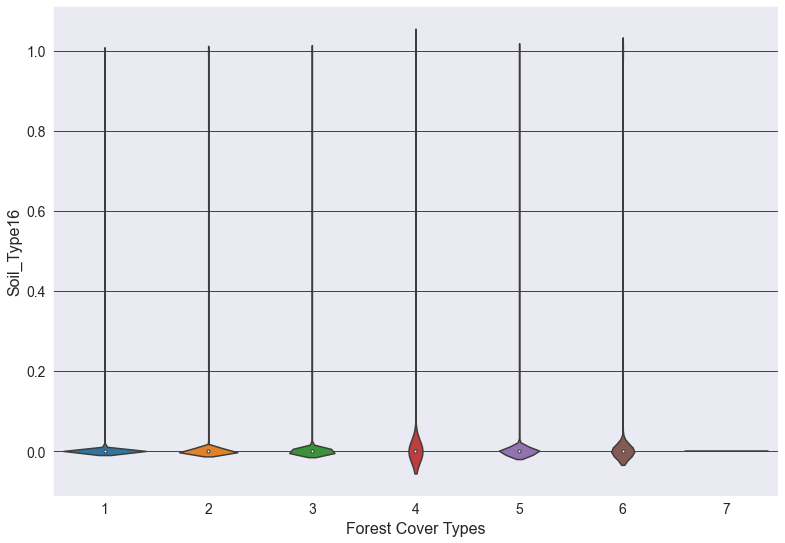

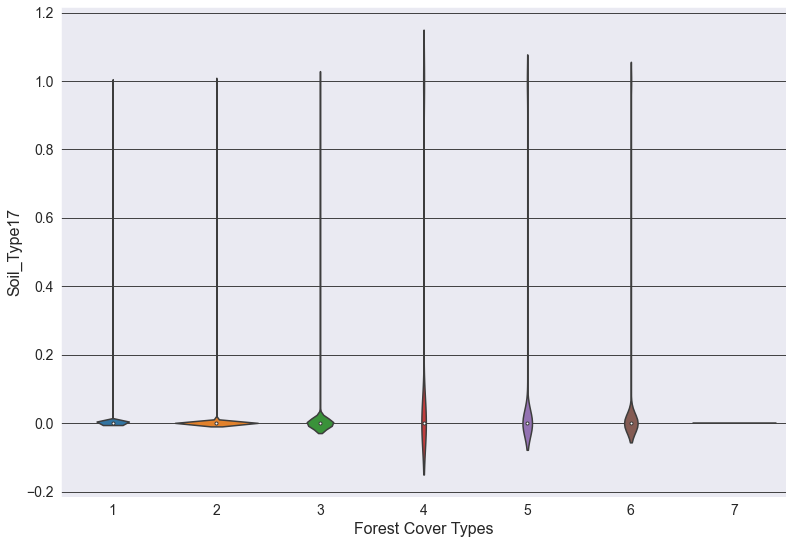

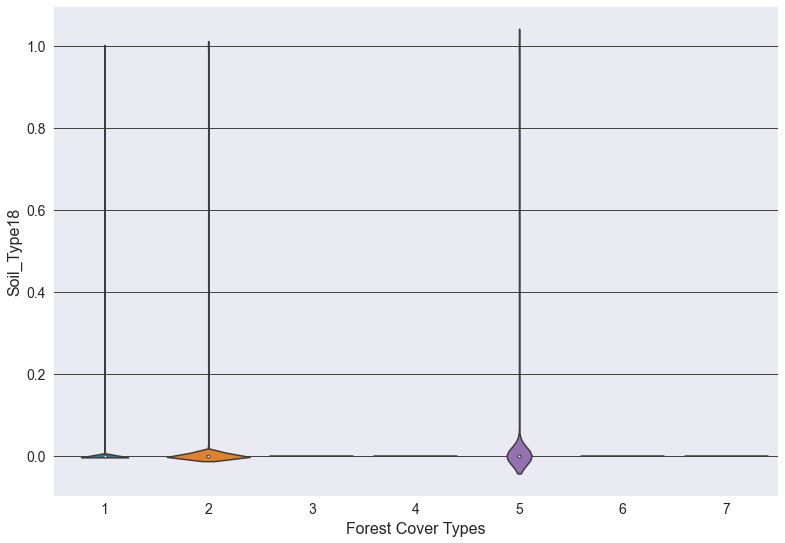

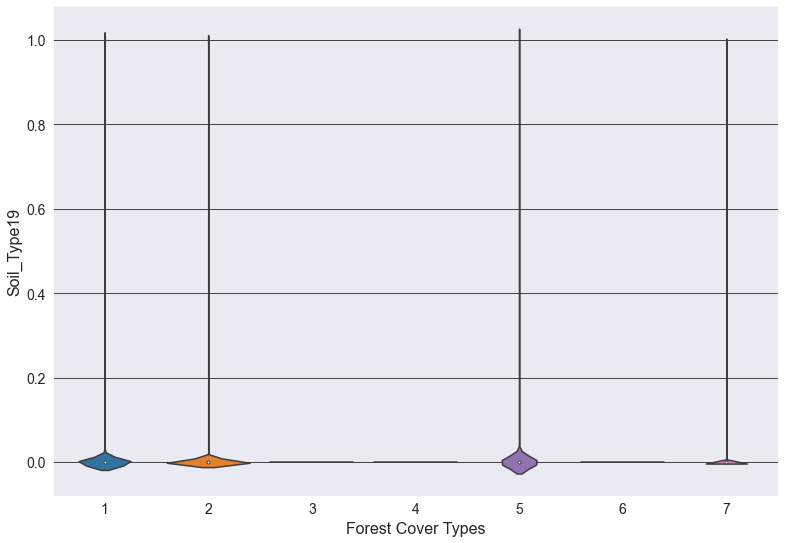

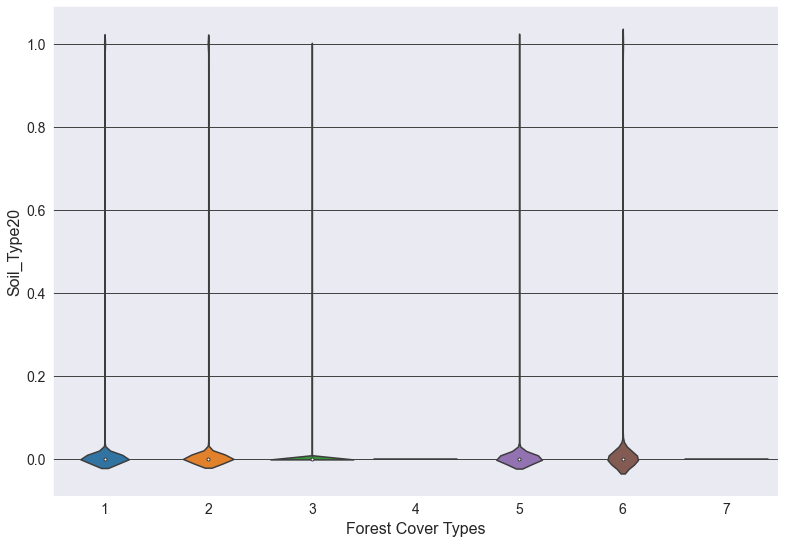

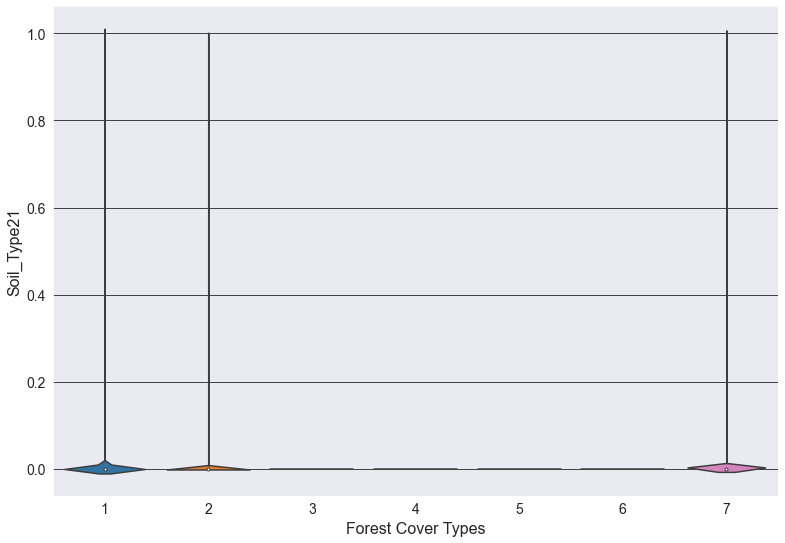

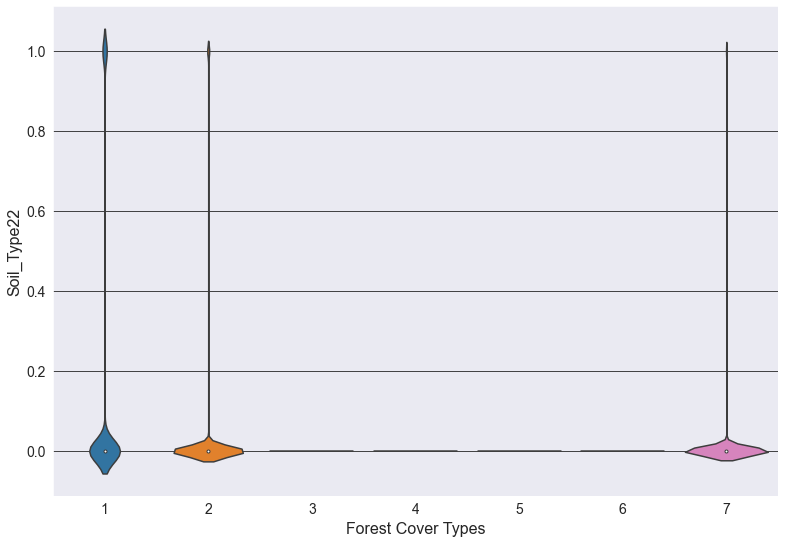

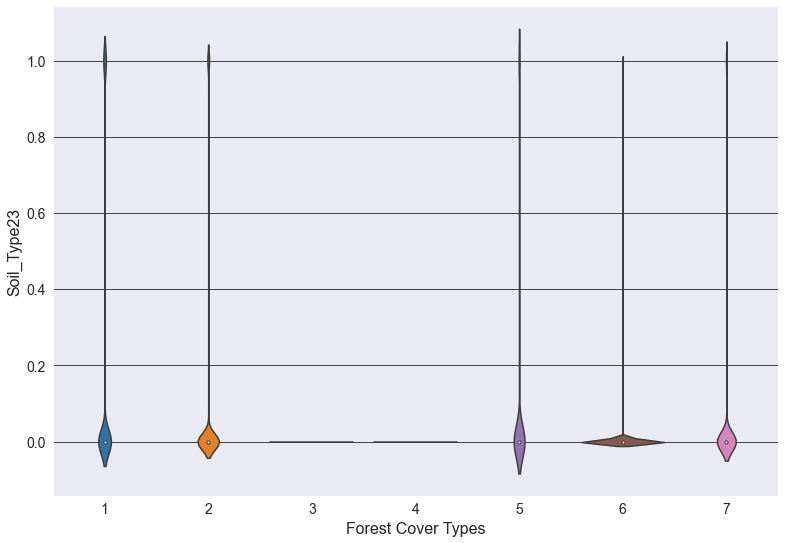

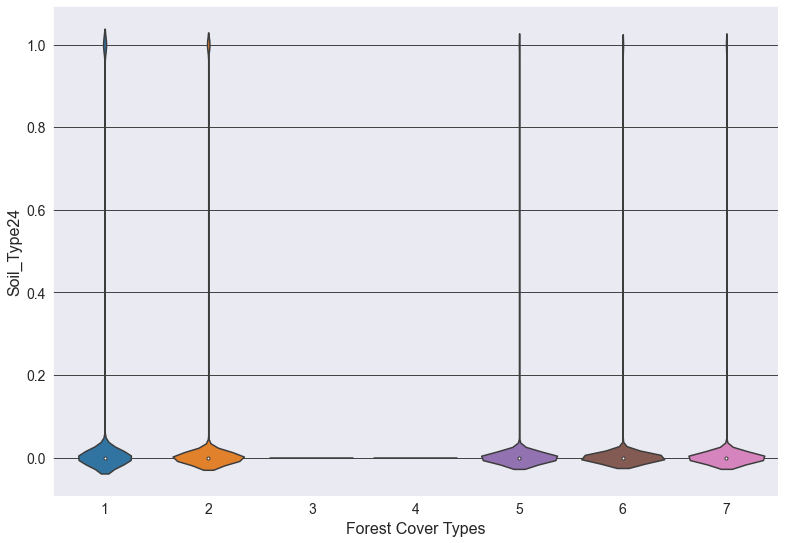

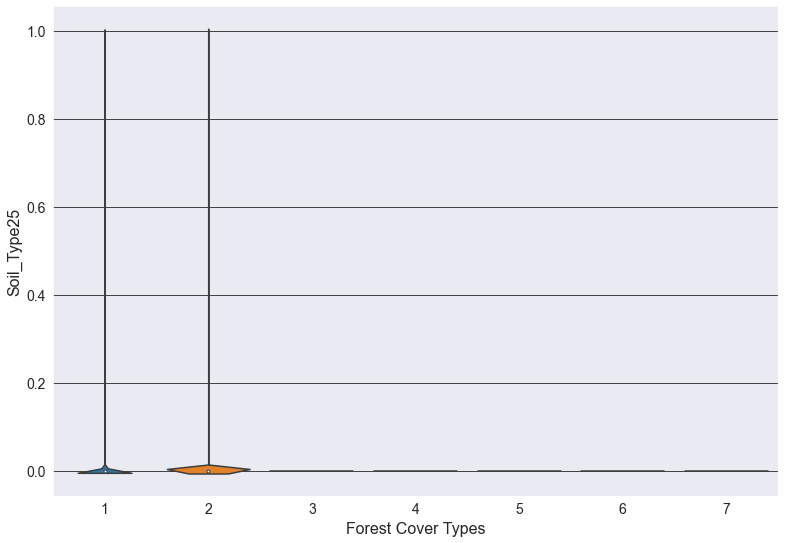

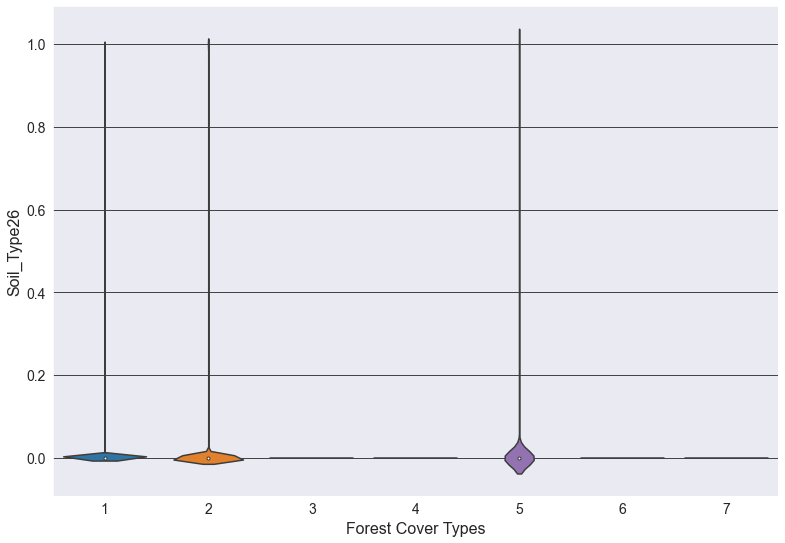

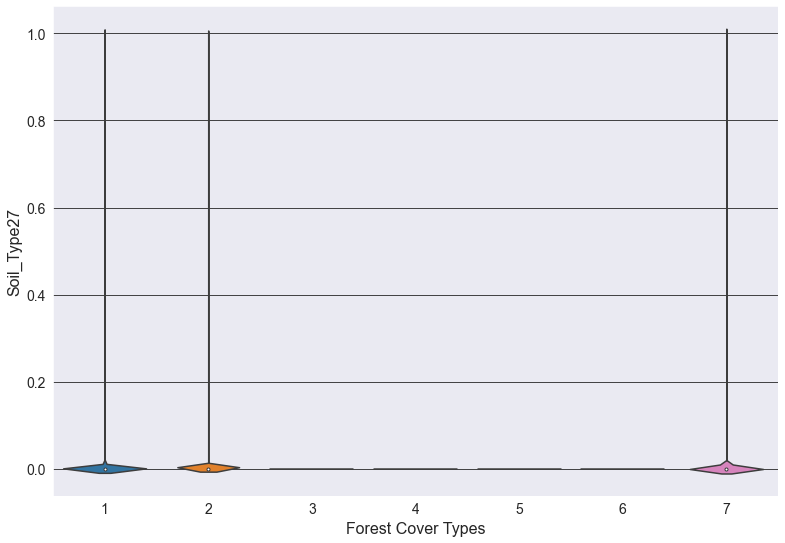

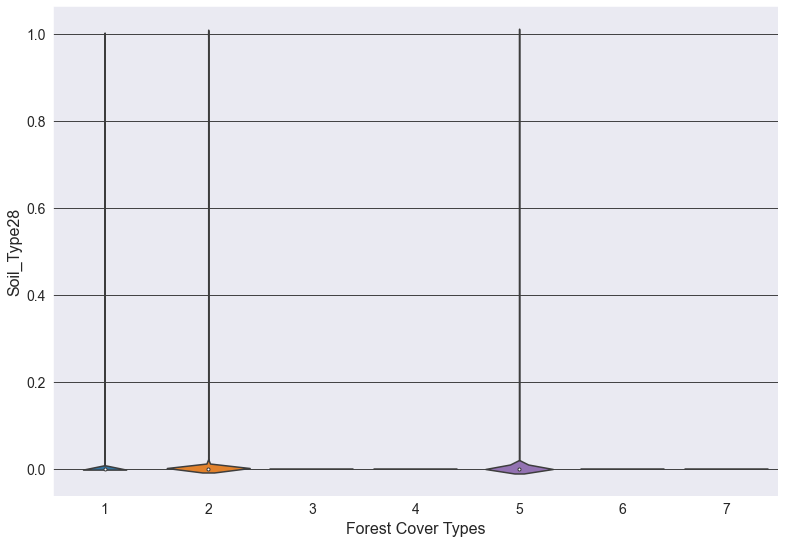

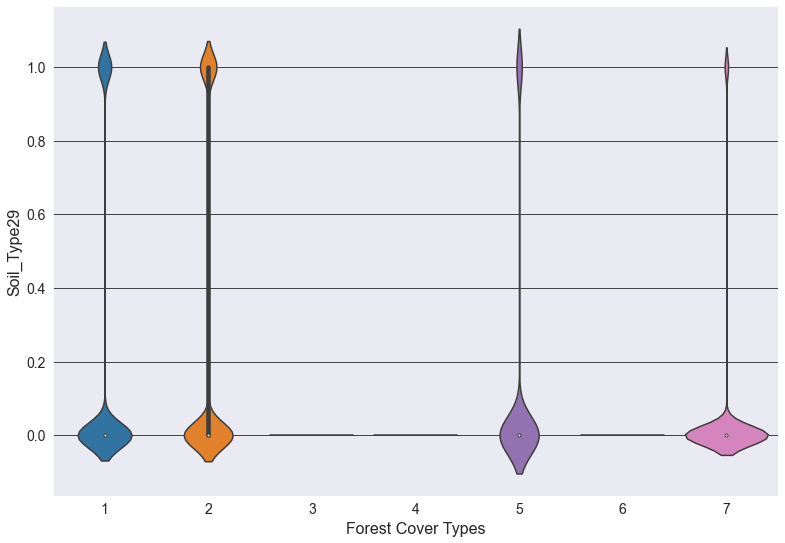

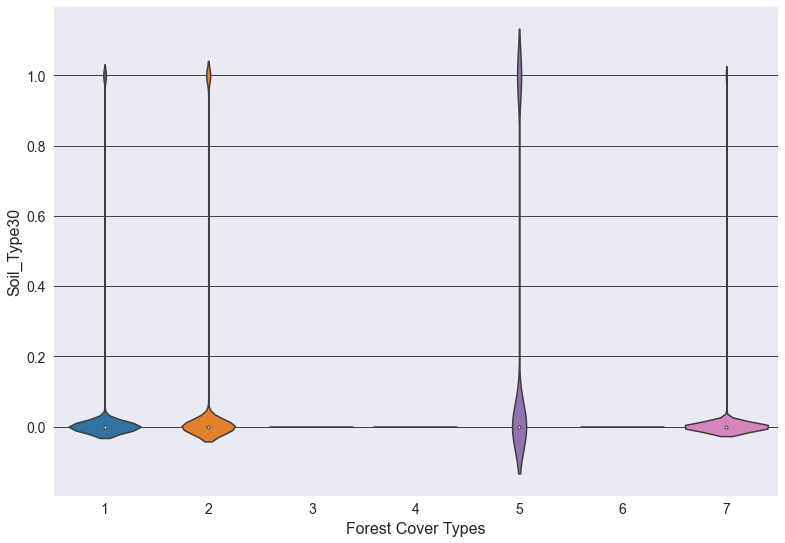

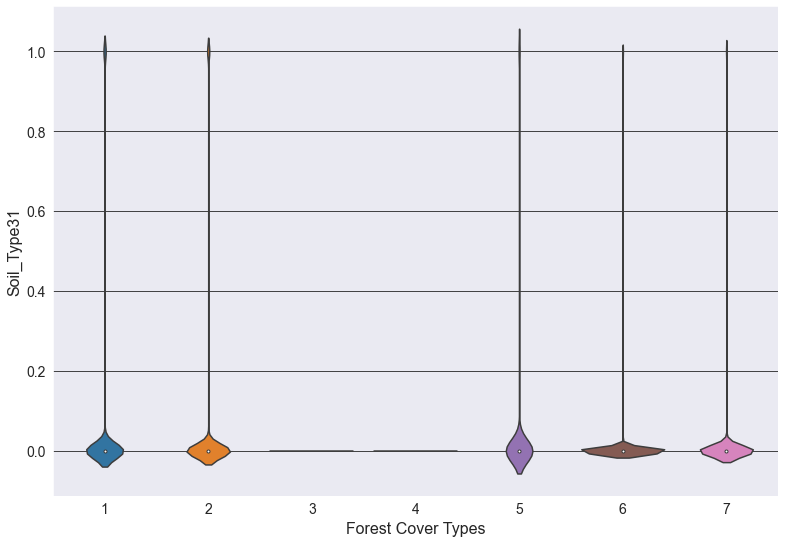

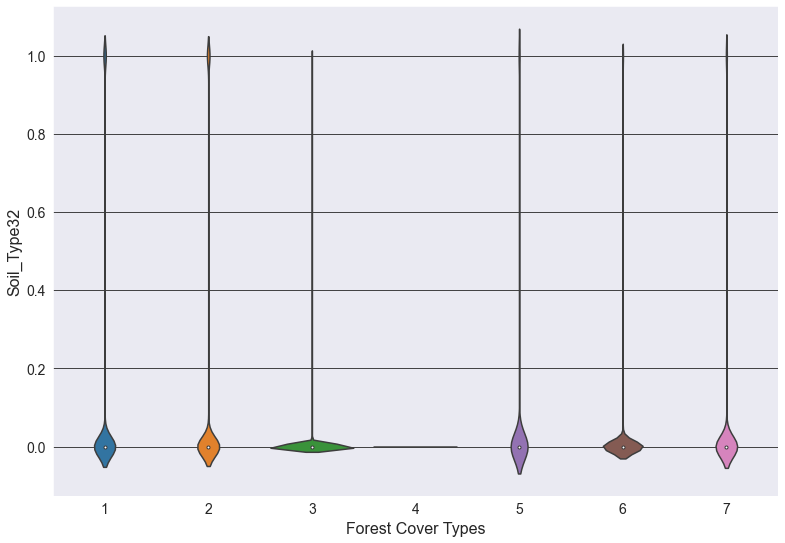

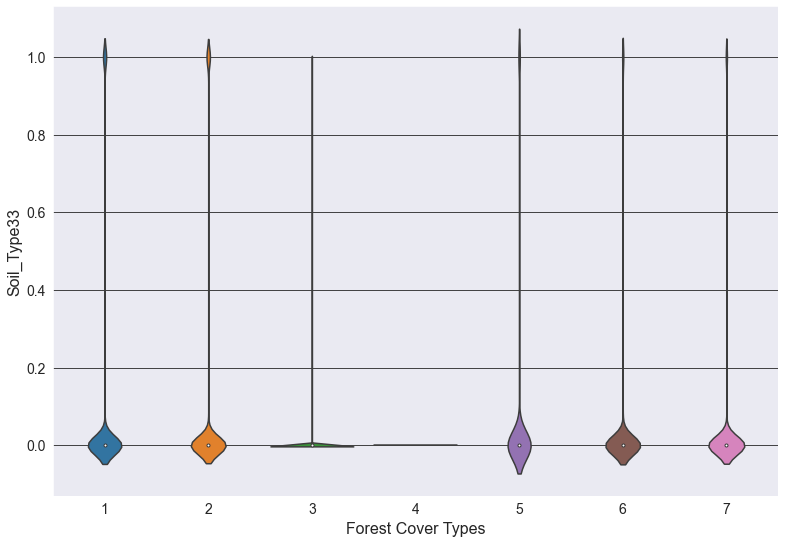

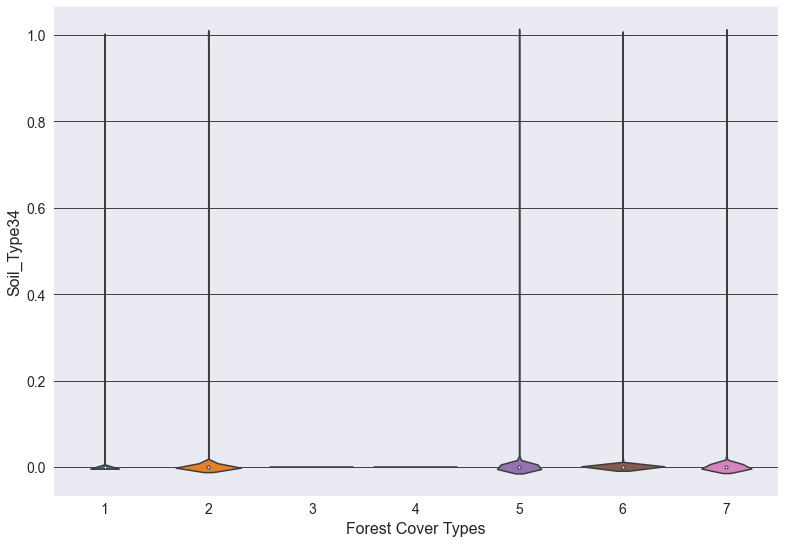

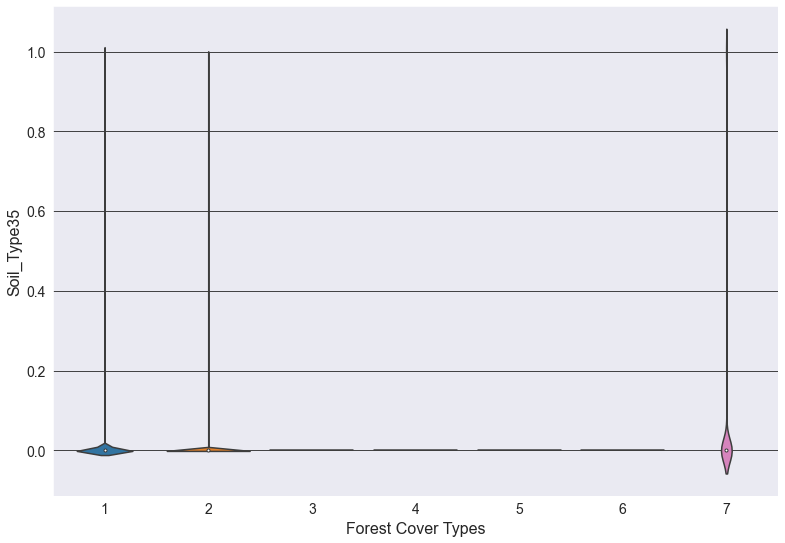

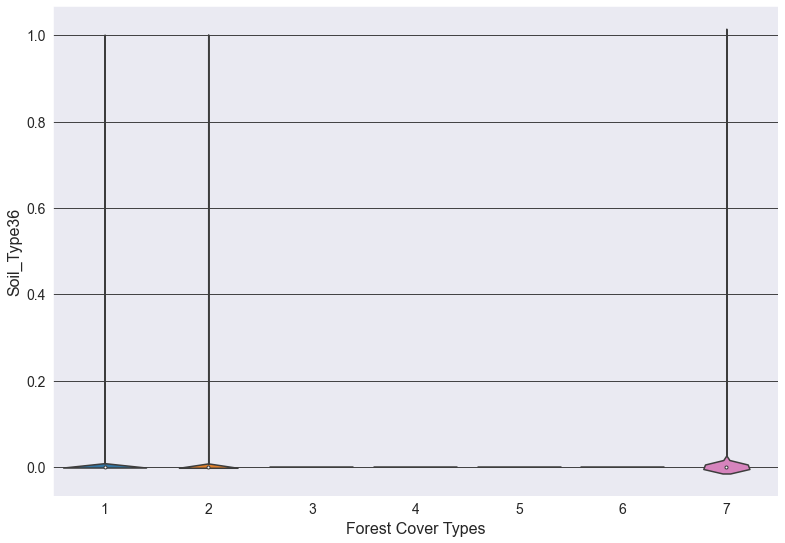

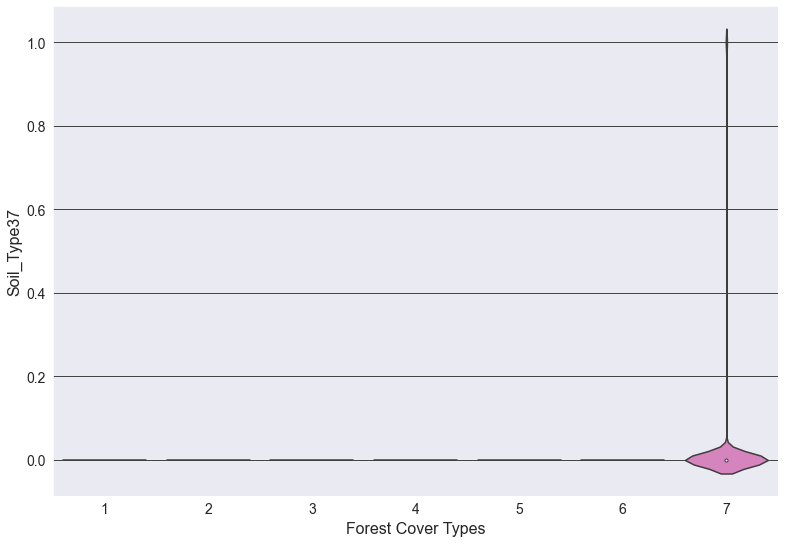

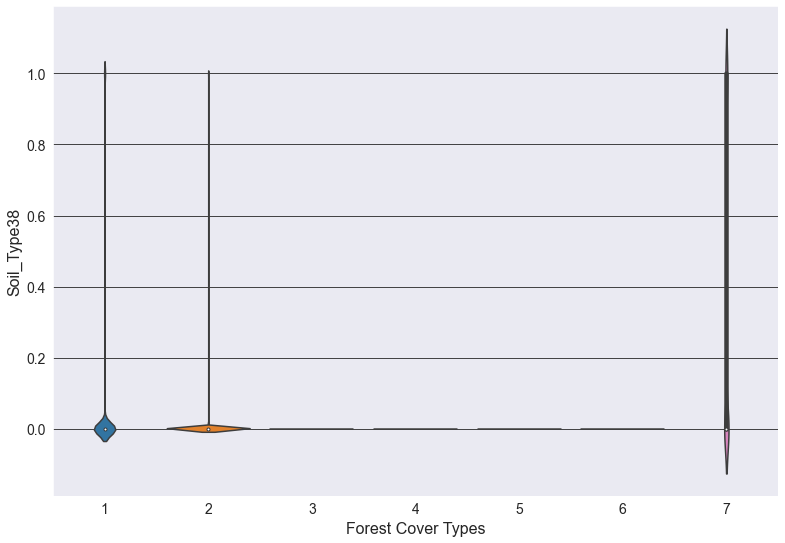

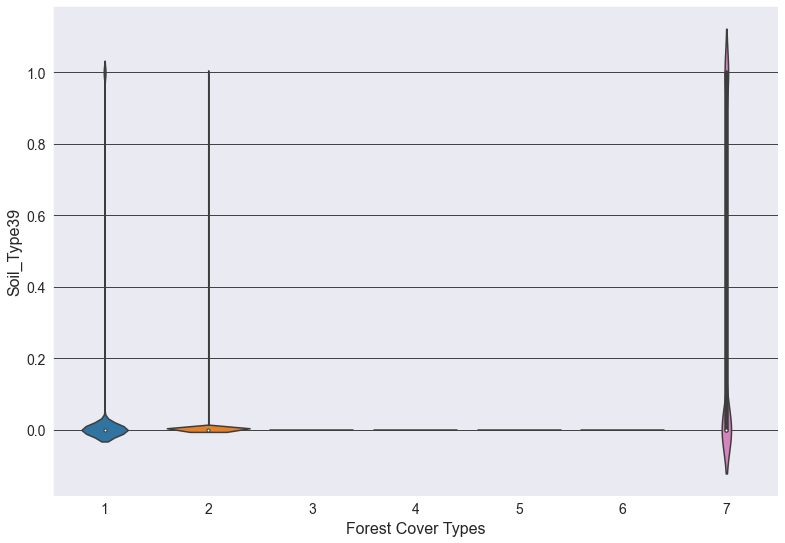

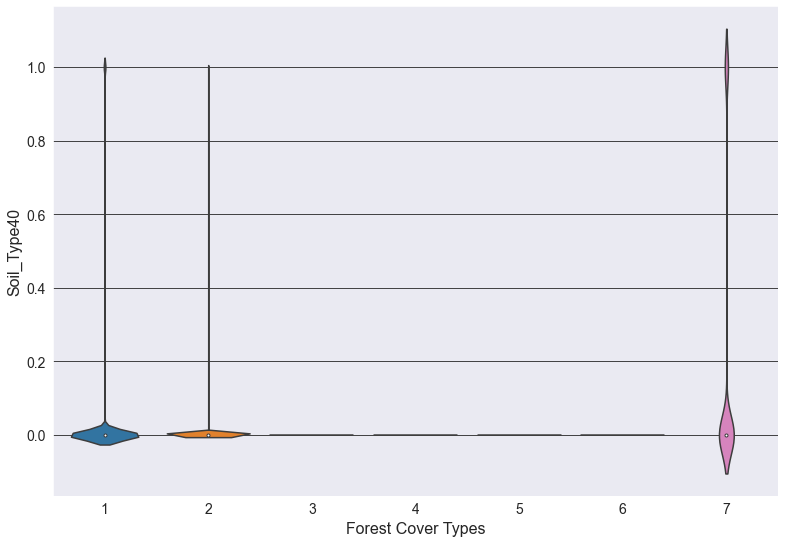

In [27]:
# plot bg
sns.set_style("darkgrid", {'grid.color':'.1'})

# set target variable
target = train['Cover_Type']
# features compare with target variable
features = soil_data.columns

# violin for loop
for i in range(0, len(features)):
    plt.subplots(figsize=(13,9))
    sns.violinplot(data=soil_data, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=16)
    plt.ylabel(features[i], size=16)
    
    plt.show()

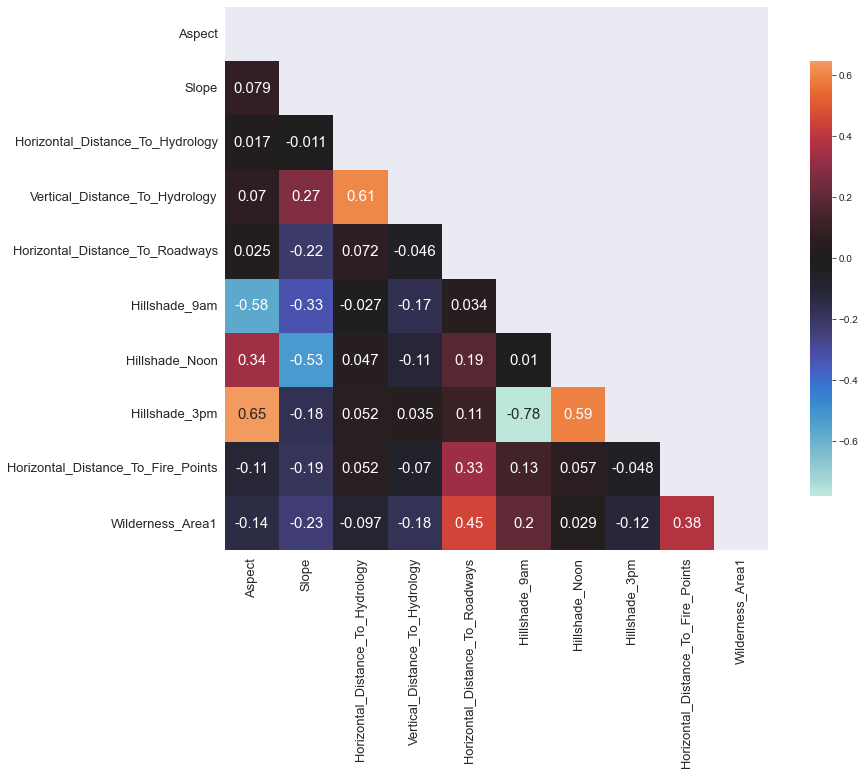

In [28]:
plt.subplots(figsize=(15,10))

# compute correlation matrix
num_features_corr = num_features.corr()

# generate mask for upper triangle
mask = np.zeros_like(num_features_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate heatmap masking the upper triangle and shrink the cbar
sns.heatmap(num_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

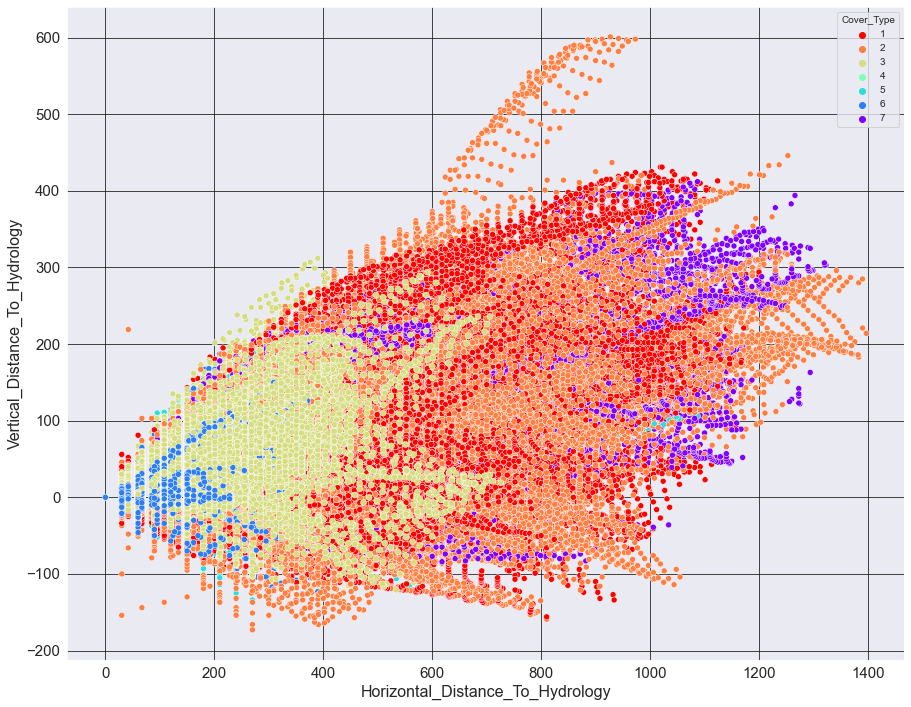

ValueError: Could not interpret value `Elevation` for parameter `x`

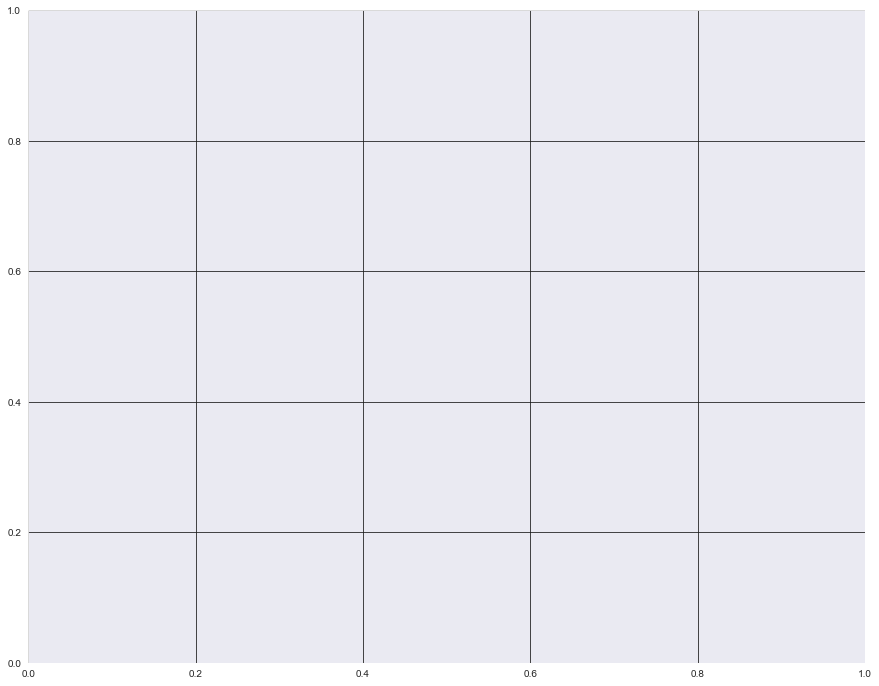

In [29]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# paired features with positive correlation
list_data_corr = [['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],
                  ['Elevation','Horizontal_Distance_To_Roadways'],
                  ['Aspect','Hillshade_3pm'],
                  ['Hillshade_3pm','Hillshade_Noon']]

# loop through outer list
# take 2 features from inner list
for i,j in list_data_corr:
    plt.subplots(figsize=(15,12))
    sns.scatterplot(data=train, x=i, y=j, hue="Cover_Type", legend='full', palette='rainbow_r')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel(i, size=16)
    plt.ylabel(j, size=16)
    
    plt.show()

In [30]:
# count for more than 1 presence
more_count = 0
# count for no presence
none_count = 0
# total count
total = 0

# loop through each row of wilderness area column
for index, row in wild_data.iterrows():
    # add the values of each col of that row
    total = row.sum(axis=0)
    
    # check for greater than 1
    if total > 1:
        more_count += 1
        total = 0
        break
        
    # check for none    
    if total == 0:
        none_count += 1
        total = 0
        
print(f'We have {more_count} observations that shows presence in more than 1 Wilderness Area.')
print(f'We have {none_count} observations that shows no presence in any Wilderness Area.')

We have 1 observations that shows presence in more than 1 Wilderness Area.
We have 1836 observations that shows no presence in any Wilderness Area.


In [31]:
# count for more than 1 presence
more_count = 0
# count for no presence
none_count = 0
# total count
total = 0

# loop through each row of soil type column
for index, row in soil_data.iterrows():
    # add the values of each col of that row
    total = row.sum(axis=0)
    
    # check for greater than 1
    if total > 1:
        more_count += 1
        total = 0
        break
        
    # check for none
    if total == 0:
        none_count += 1
        total = 0

print(f'We have {more_count} observations that shows presence in more than 1 Soil Type Area.')
print(f'We have {none_count} observations that shows no presence in any Soil Type Area.')

We have 0 observations that shows presence in more than 1 Soil Type Area.
We have 3031 observations that shows no presence in any Soil Type Area.


In [32]:
#handle miss val
train.dropna()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,51,3,258,0,510,221,232,148,6279,1,...,0,0,0,0,0,0,0,0,0,5
1,56,2,212,-6,390,220,235,151,6225,1,...,0,0,0,0,0,0,0,0,0,5
2,139,9,268,65,3180,234,238,135,6121,1,...,0,0,0,0,0,0,0,0,0,2
3,155,18,242,118,3090,238,238,122,6211,1,...,0,0,0,0,0,0,0,0,0,2
4,45,2,153,-1,391,220,234,150,6172,1,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,153,20,85,17,108,240,237,118,837,0,...,0,0,0,0,0,0,0,0,0,3
581008,152,19,67,12,95,240,237,119,845,0,...,0,0,0,0,0,0,0,0,0,3
581009,159,17,60,7,90,236,241,130,854,0,...,0,0,0,0,0,0,0,0,0,3
581010,170,15,60,5,90,230,245,143,864,0,...,0,0,0,0,0,0,0,0,0,3


In [33]:
train.shape

(581012, 54)

In [34]:
# delete duplicates, except the first observation
train.drop_duplicates(keep='first')

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,51,3,258,0,510,221,232,148,6279,1,...,0,0,0,0,0,0,0,0,0,5
1,56,2,212,-6,390,220,235,151,6225,1,...,0,0,0,0,0,0,0,0,0,5
2,139,9,268,65,3180,234,238,135,6121,1,...,0,0,0,0,0,0,0,0,0,2
3,155,18,242,118,3090,238,238,122,6211,1,...,0,0,0,0,0,0,0,0,0,2
4,45,2,153,-1,391,220,234,150,6172,1,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,153,20,85,17,108,240,237,118,837,0,...,0,0,0,0,0,0,0,0,0,3
581008,152,19,67,12,95,240,237,119,845,0,...,0,0,0,0,0,0,0,0,0,3
581009,159,17,60,7,90,236,241,130,854,0,...,0,0,0,0,0,0,0,0,0,3
581010,170,15,60,5,90,230,245,143,864,0,...,0,0,0,0,0,0,0,0,0,3


In [35]:
train.shape

(581012, 54)

In [36]:
#Model EVAL
from sklearn.model_selection import cross_val_score
import time

# function
def model_evaluation(clf):
    clf = clf # pass classifier to variable
    
    t_start = time.time() # record time
    clf = clf.fit(X_train, y_train) # classifier learning model
    t_end = time.time() # record time
    
    c_start = time.time() # record time
    accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
    c_end = time.time() # record time
    
    # calculate mean of all 10 obs' accuracy and f1 as percent
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    t_time = np.round((t_end - t_start) / 60, 3) # time for training
    c_time = np.round((c_end - c_start) / 60, 3) # time for evaluating scores
    
    clf = None # remove traces of classifier
    
    print(f'The accuracy score of this classifier is: {acc_mean}%.')
    print(f'The f1 score of this classifier is: {f1_mean}%.')
    print(f'This classifier took {t_time} minutes to train and {c_time} minutes to evaluate CV and metric scores.')

In [37]:
def get_error_rate(pred, y):
    return sum(pred != y) / float(len(y))

In [38]:
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f' % err)

In [39]:
def gen_clf(y_train, X_train, y_test, X_test, clf):
    clf.fit(X_train,y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, y_train), \
           get_error_rate(pred_test, y_test)

In [40]:
def adaboost_clf(y_train, X_train, y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # start weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        ind = [int(x) for x in (pred_train_i != y_train)]
        # Equivalent with 1/-1 to update weights
        ind2 = [x if x==1 else -1 for x in ind]
        # Error
        TE = np.dot(w,ind) / sum(w)
        # Alpha
        alpha = 0.5 * np.log( (1 - TE) / float(TE))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha for x in ind2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, y_train), \
           get_error_rate(pred_test, y_test)

In [41]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,45,5))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

The accuracy score of this classifier is: 50.18%.
The f1 score of this classifier is: 31.07%.
This classifier took 0.66 minutes to train and 14.996 minutes to evaluate CV and metric scores.


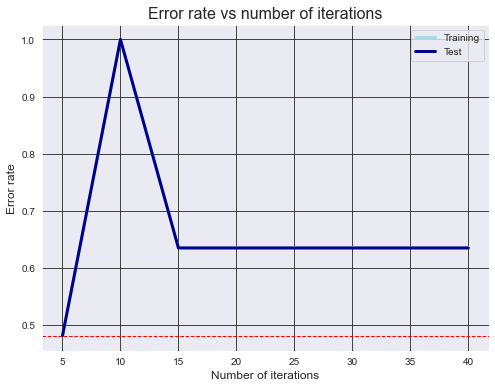

In [42]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
X = train.iloc[:,:-1] # feed features to var X
y = train['Cover_Type'] # feed target variable to y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=53)
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = gen_clf(y_train, X_train, y_test, X_test, clf_tree)
    
# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(0,7)
for i in x_range:    
    er_i = adaboost_clf(y_train, X_train, y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
model_evaluation(ada_clf)    
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)


